In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

nc_file = '../cloud_results.nc'

# Show all variables
with Dataset(nc_file, 'r') as dataset:
    for var in dataset.variables:
        print(f"{var}: shape = {dataset.variables[var].shape}")

size: shape = (117, 18)
location_x: shape = (117, 18)
location_y: shape = (117, 18)
location_z: shape = (117, 18)
cloud_points: shape = (117, 18, 10000, 3)
track: shape = (117,)
time: shape = (18,)
point: shape = (10000,)
coordinate: shape = (3,)


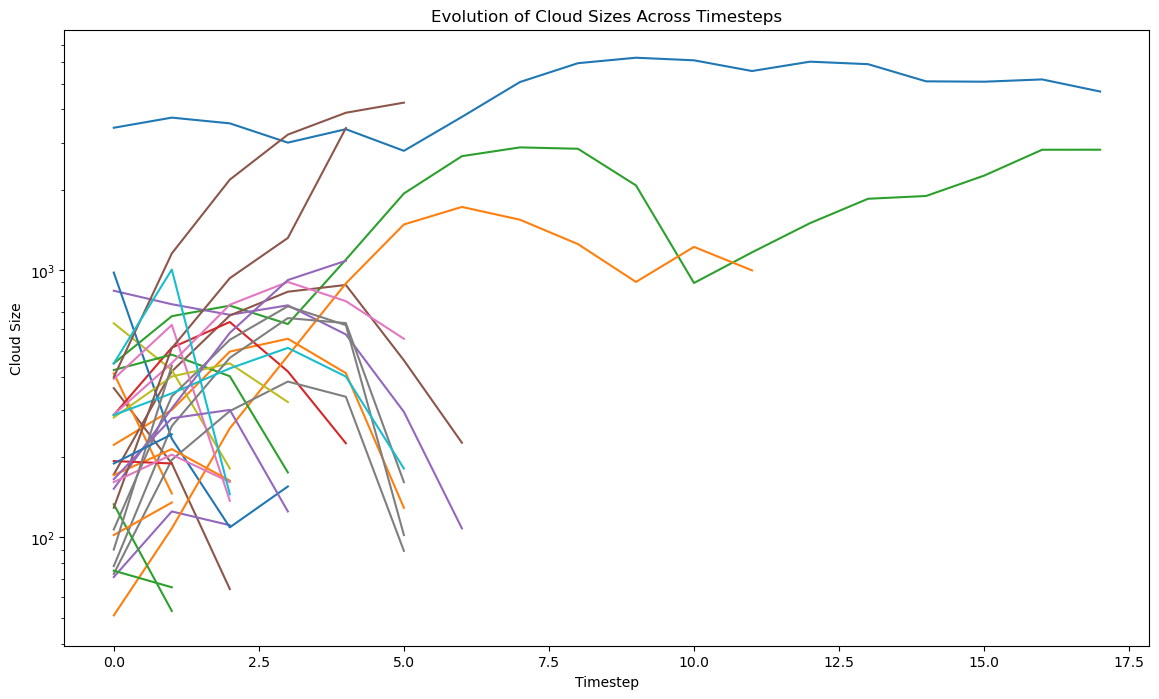

[[3416.0 136.0 448.0 ... 78.0 71.0 118.0]
 [3728.0 -- 673.0 ... -- -- --]
 [3548.0 -- 737.0 ... -- -- --]
 ...
 [5081.0 -- 2261.0 ... -- -- --]
 [5182.0 -- 2826.0 ... -- -- --]
 [4669.0 -- 2827.0 ... -- -- --]]


In [2]:
dataset = Dataset(nc_file, 'r')

# Read cloud sizes, assuming variable name is 'size' with dimensions ('cloud', 'timestep')
cloud_sizes = dataset.variables['size'][:].T  # Transpose if necessary to match ('timestep', 'cloud')

# Number of timesteps and clouds
num_timesteps = cloud_sizes.shape[0]
num_clouds = cloud_sizes.shape[1]

# Generate a plot for each cloud
plt.figure(figsize=(14, 8))

for cloud_idx in range(num_clouds):
    
    size_evolution = cloud_sizes[:, cloud_idx]
    
    # Plot the evolution
    plt.plot(range(num_timesteps), size_evolution, label=f'Cloud {cloud_idx+1}')

plt.yscale('log') # Use log scale for cloud sizes
plt.xlabel('Timestep')
plt.ylabel('Cloud Size')
plt.title('Evolution of Cloud Sizes Across Timesteps')
#plt.legend()
plt.show()

dataset.close()

print (cloud_sizes)

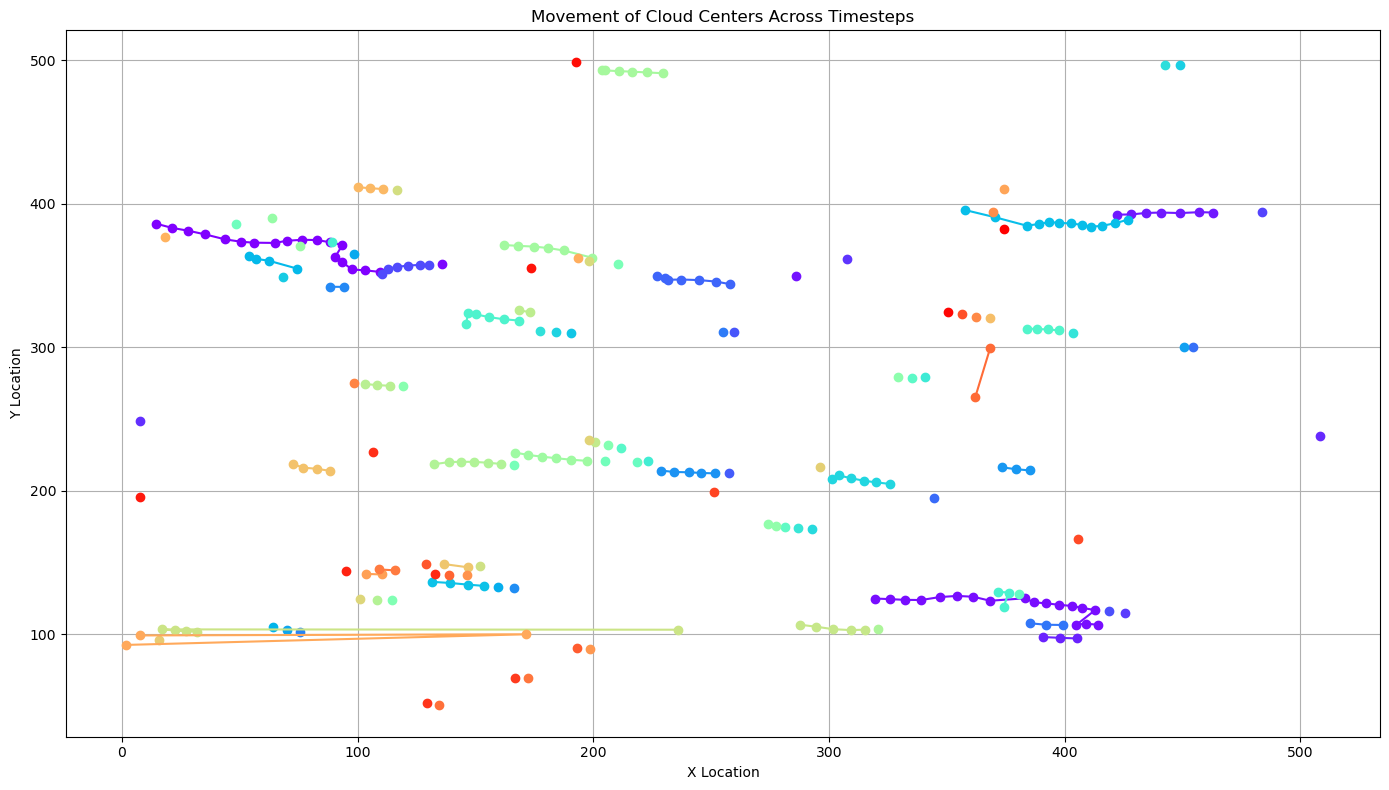

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import numpy as np
import matplotlib.cm as cm


nc_file = '../cloud_results.nc'
dataset = Dataset(nc_file, 'r')

# Reading cloud center locations
x_centers = dataset.variables['location_x'][:]  
y_centers = dataset.variables['location_y'][:]

# Number of clouds and timesteps
num_clouds, num_timesteps = x_centers.shape

# Generate a color map for clouds
colors = cm.rainbow(np.linspace(0, 1, num_clouds))

# Plot for cloud center movements
plt.figure(figsize=(14, 8))

for cloud_idx in range(num_clouds):
    # Filter out NaN values for x and y centers
    valid_idx = ~np.isnan(x_centers[cloud_idx, :]) & ~np.isnan(y_centers[cloud_idx, :])
    if np.any(valid_idx):  # Check if there are any valid points to plot for this cloud
        plt.plot(x_centers[cloud_idx, valid_idx], y_centers[cloud_idx, valid_idx], '-o', color=colors[cloud_idx], label=f'Cloud {cloud_idx+1}')

plt.xlabel('X Location')
plt.ylabel('Y Location')
plt.title('Movement of Cloud Centers Across Timesteps')
plt.grid(True)
plt.tight_layout()
#plt.legend()
plt.show()

dataset.close()


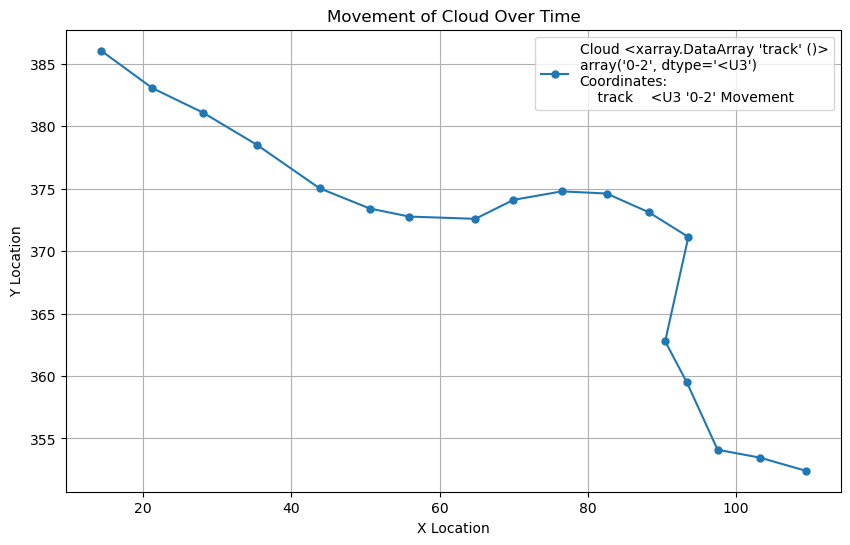

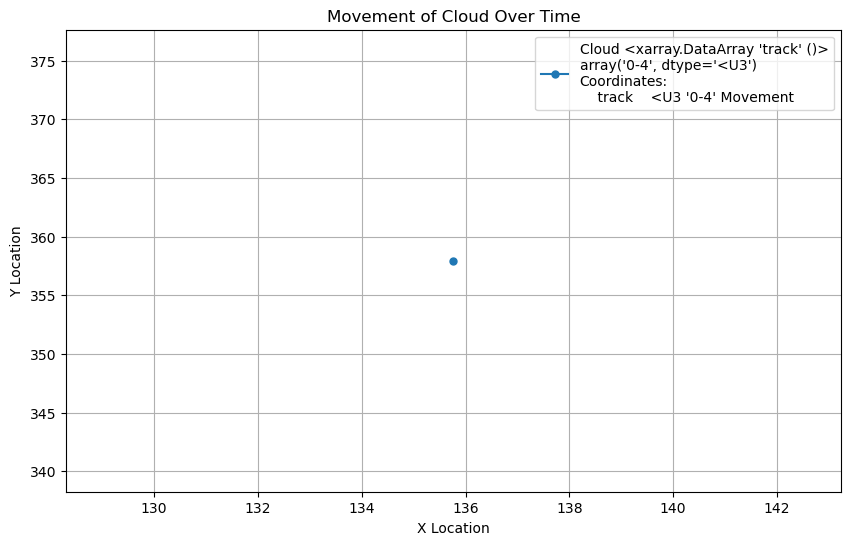

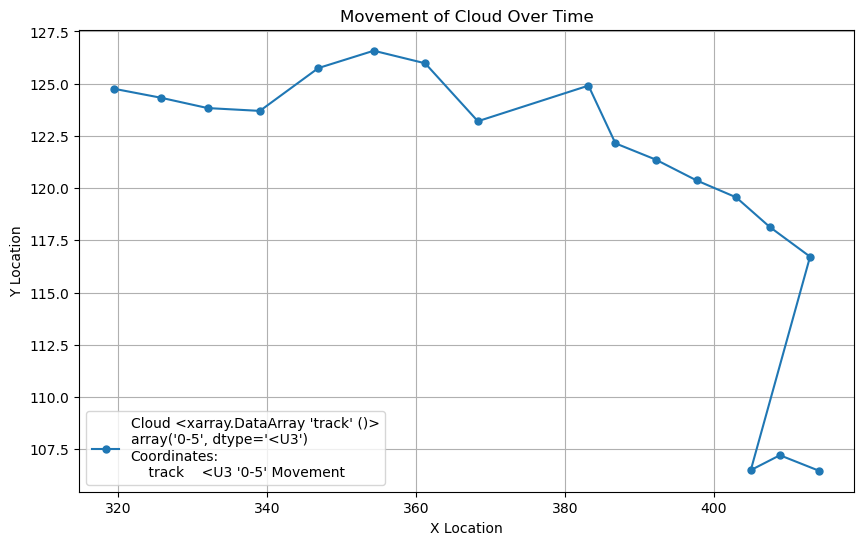

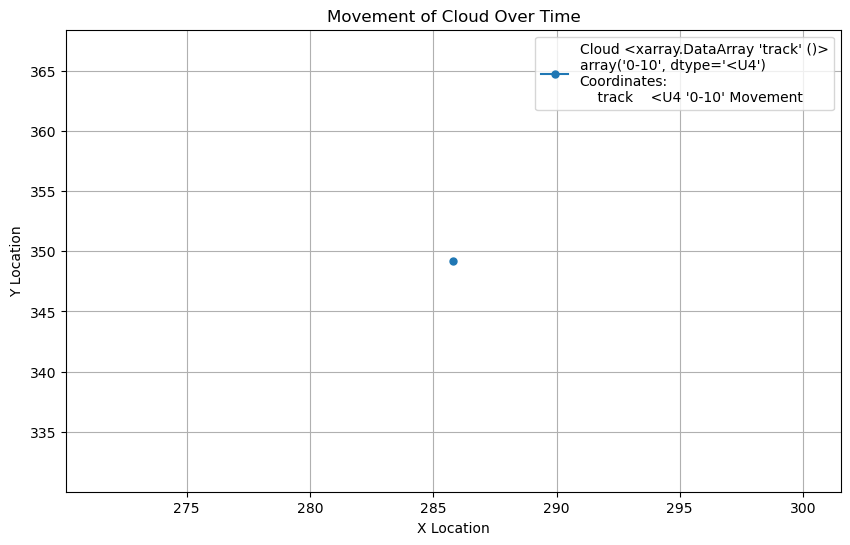

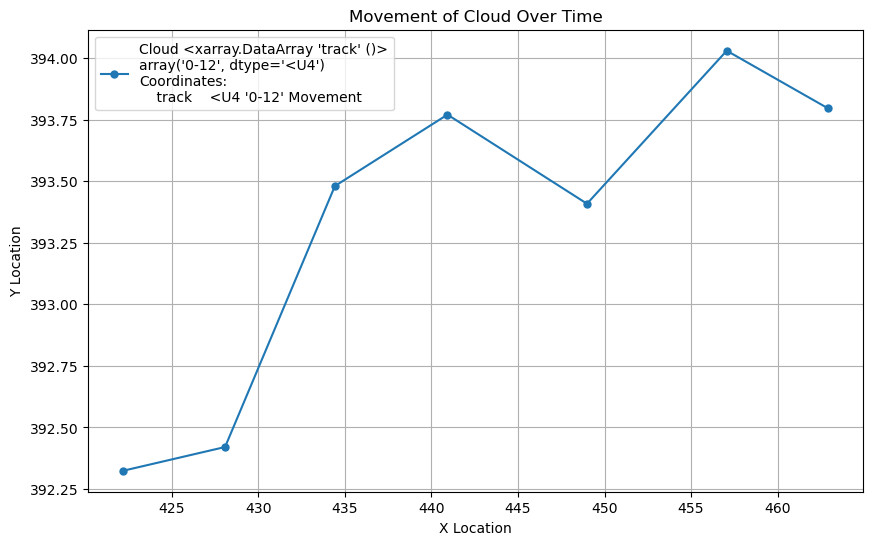

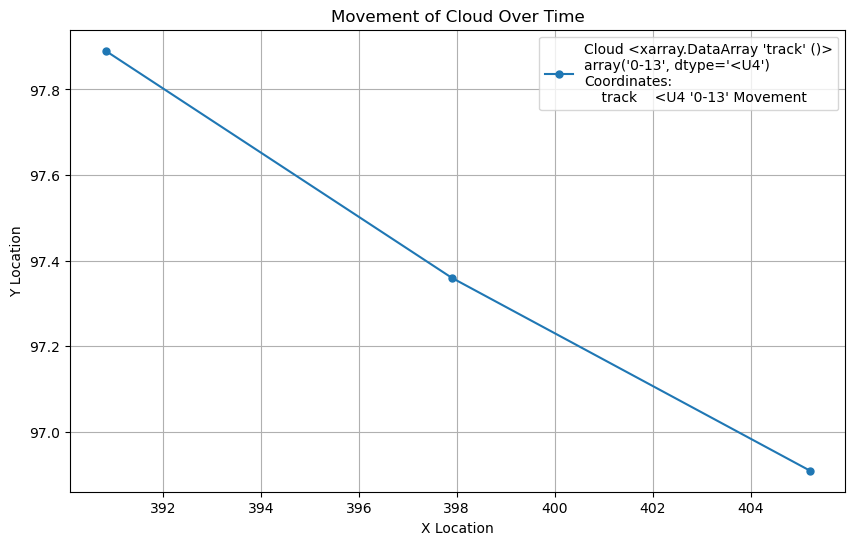

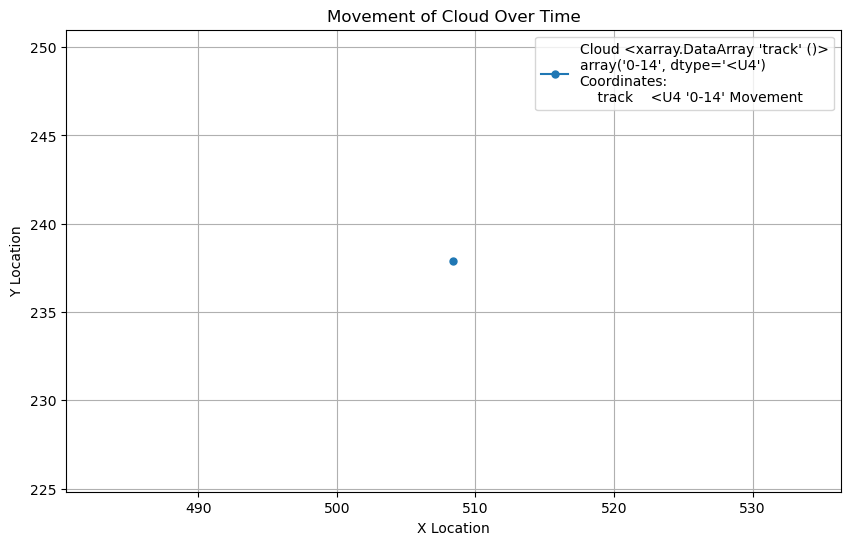

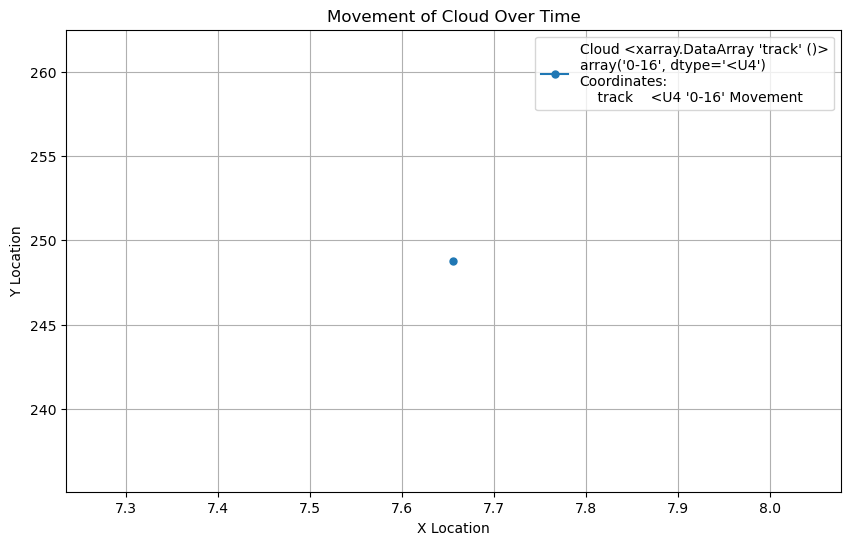

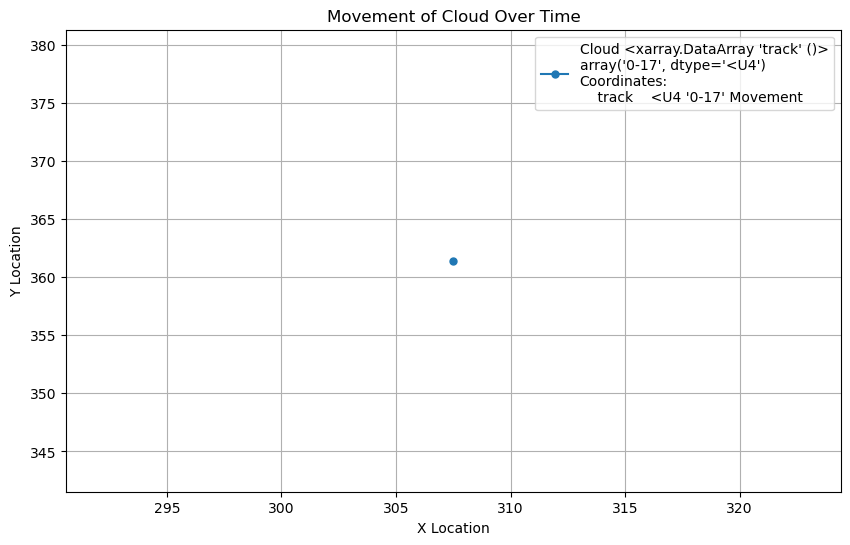

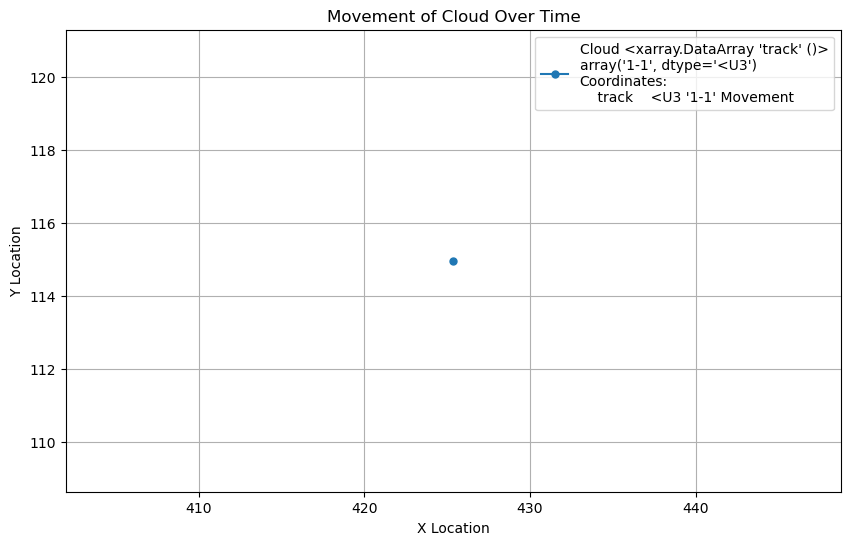

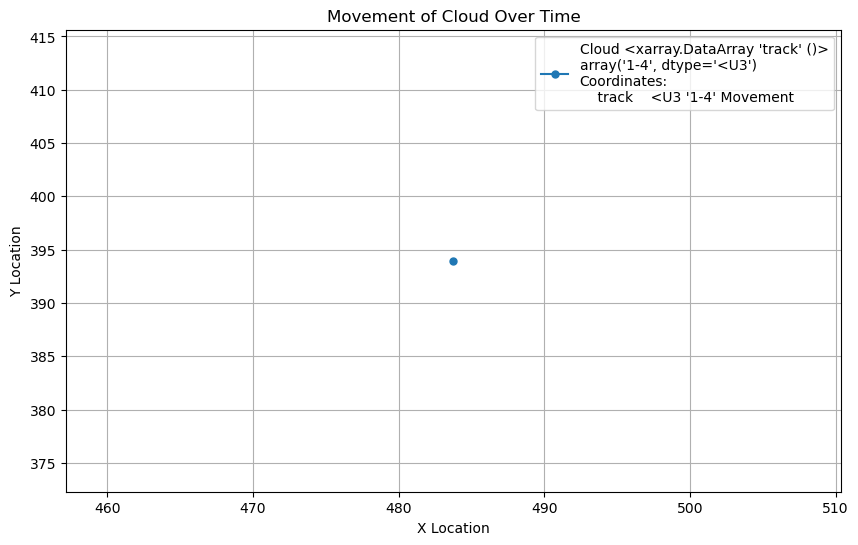

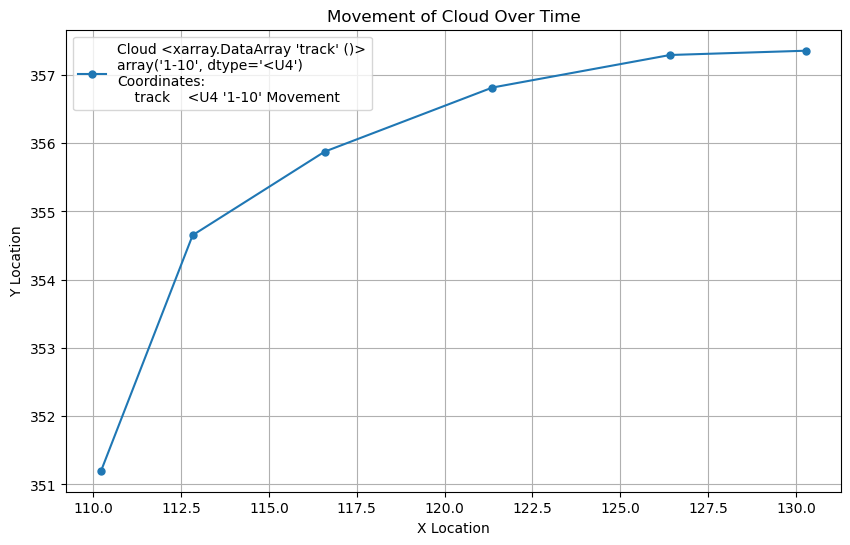

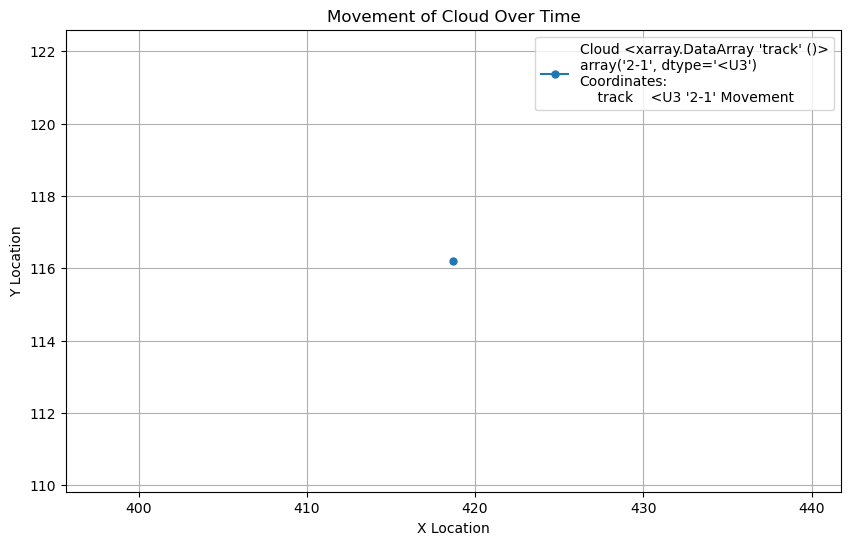

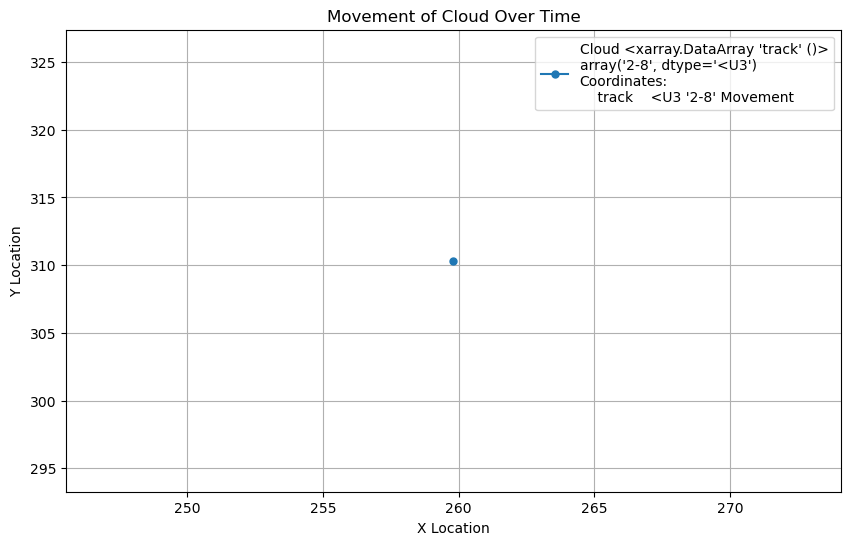

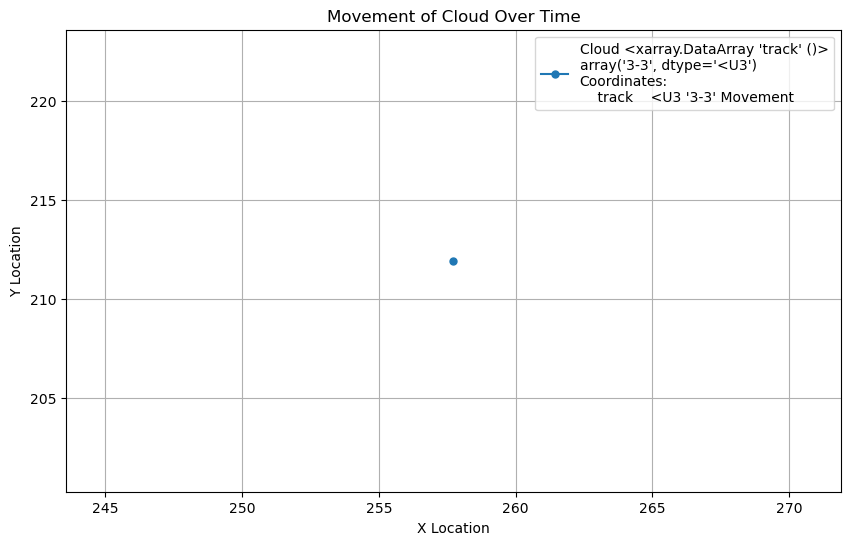

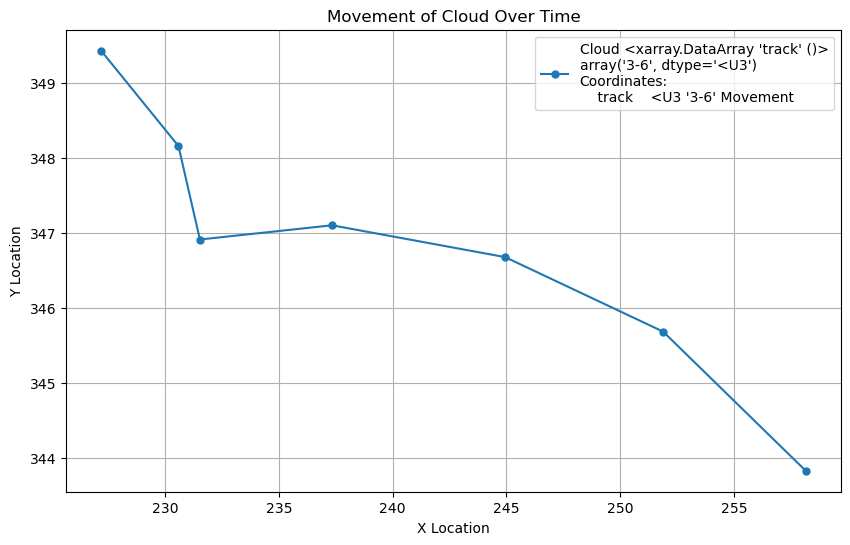

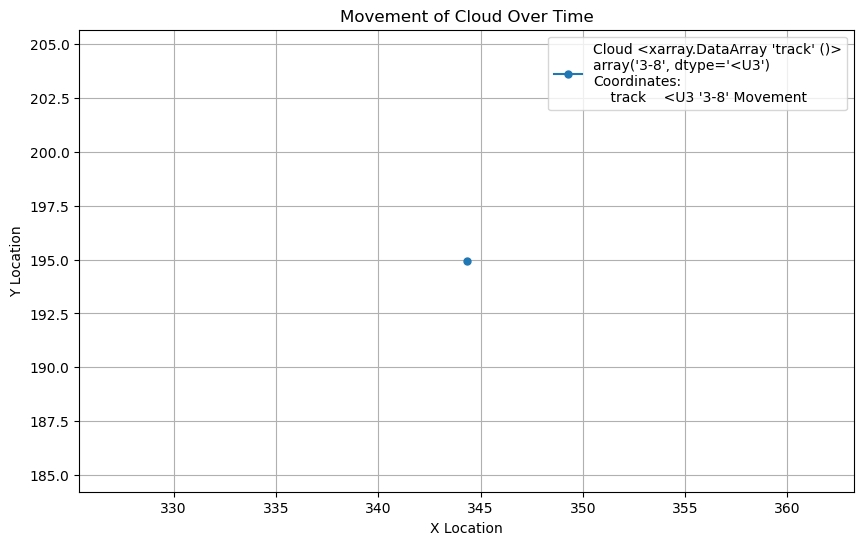

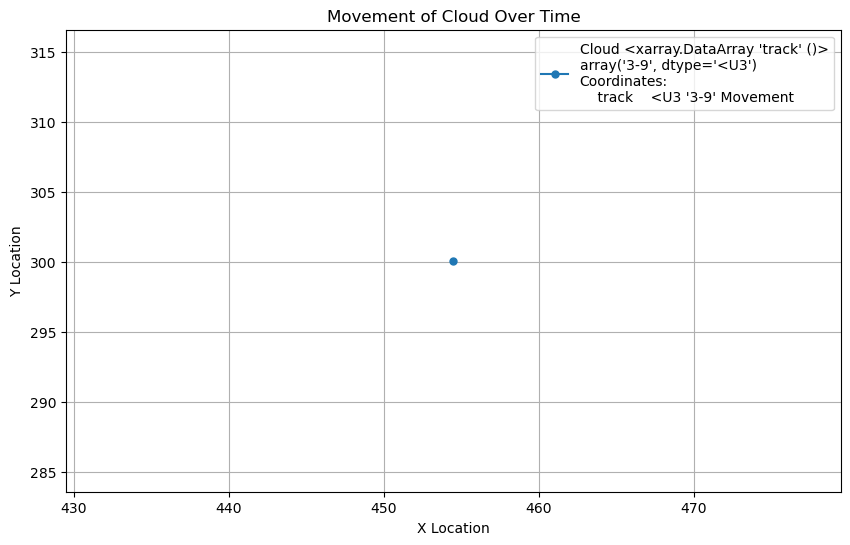

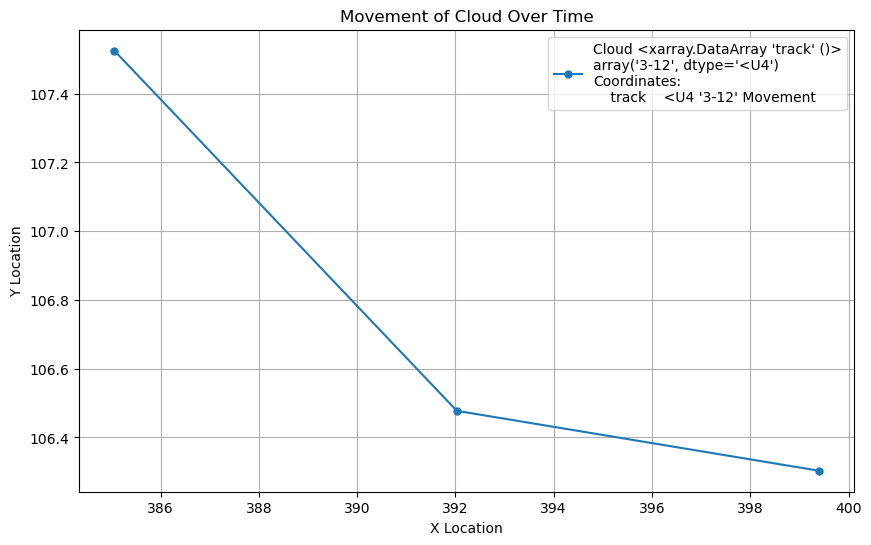

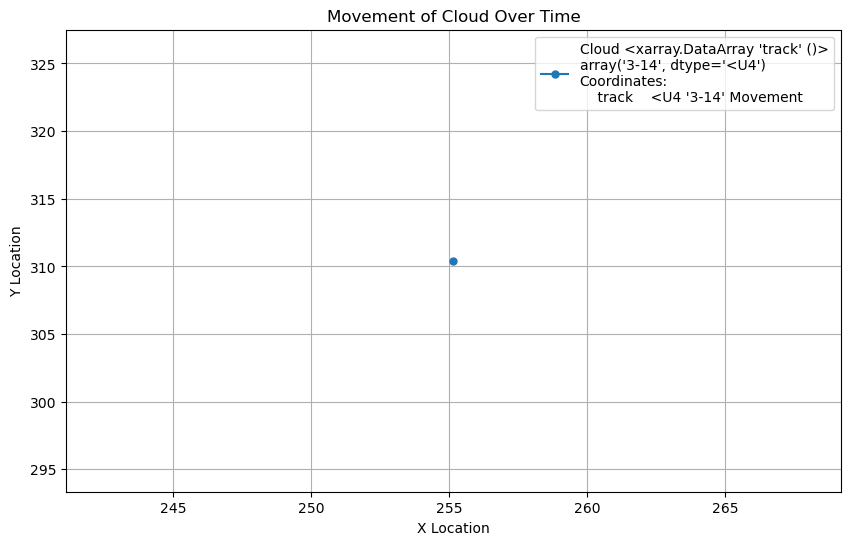

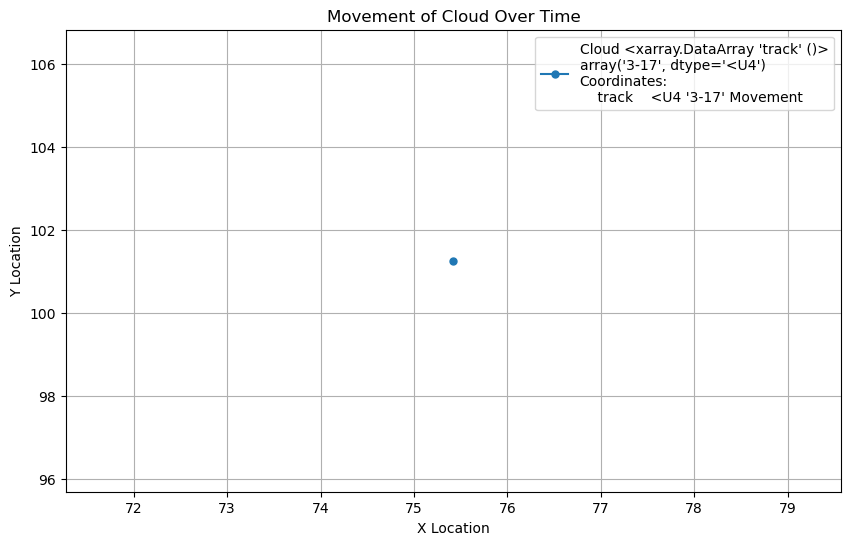

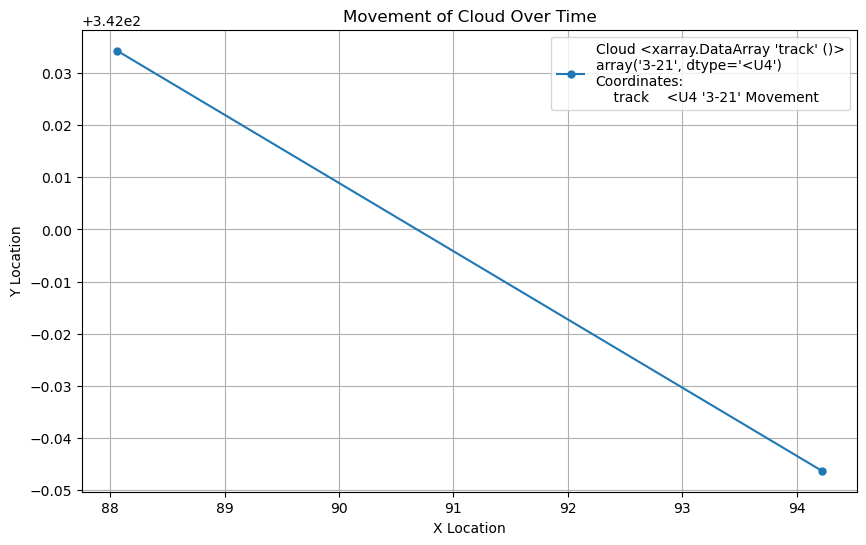

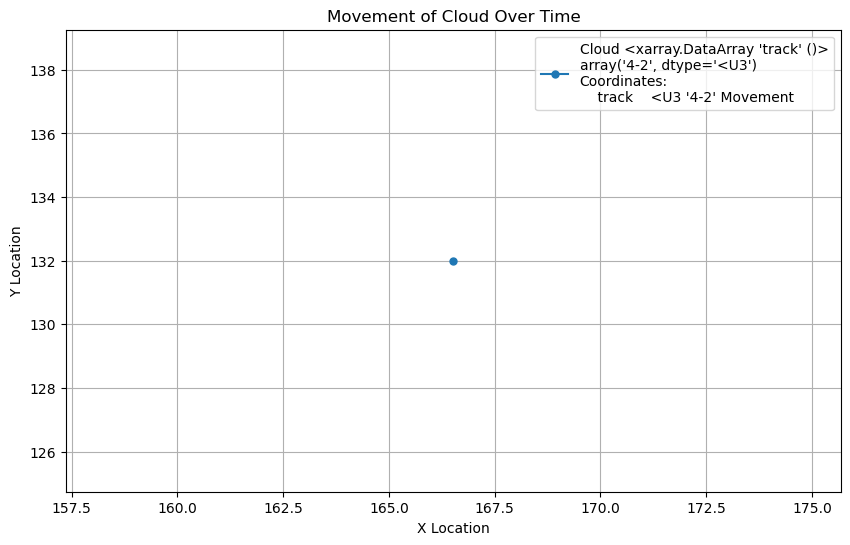

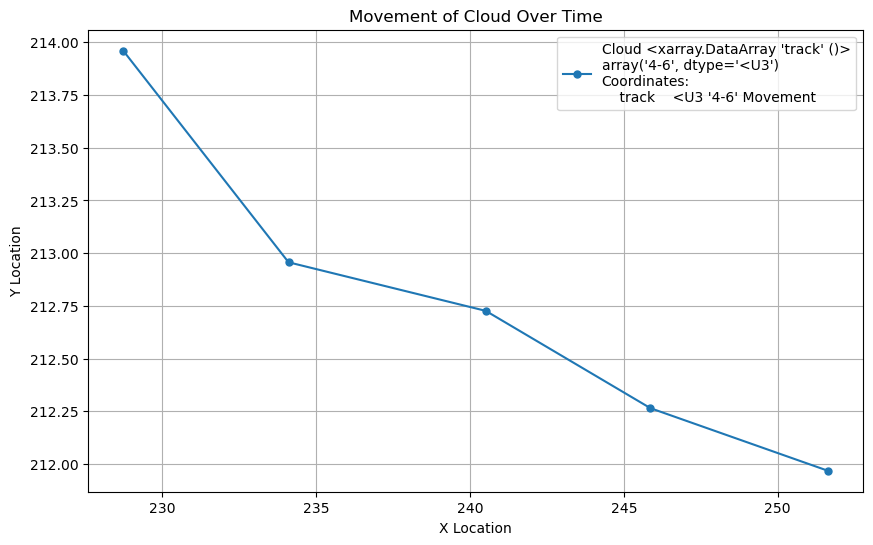

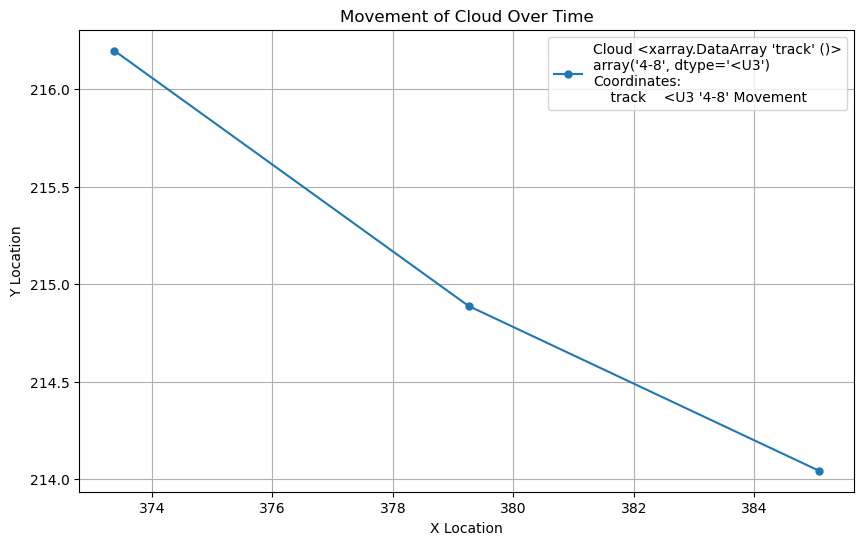

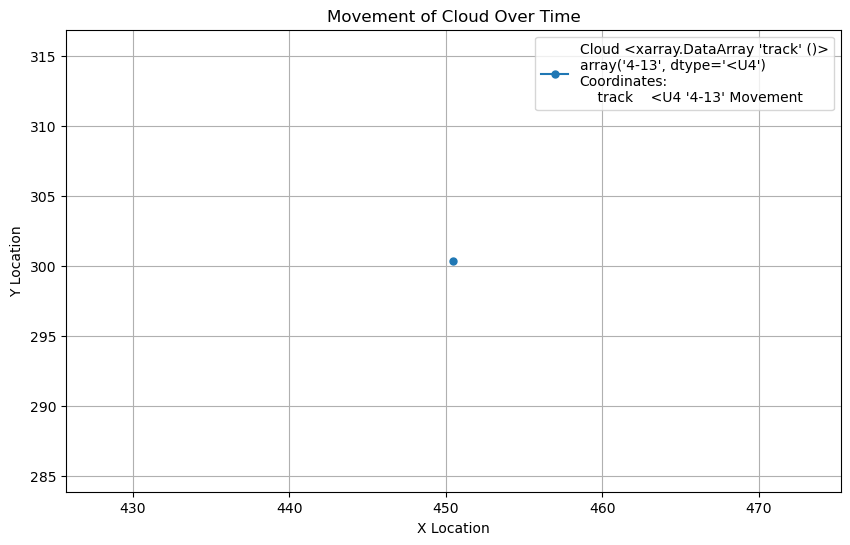

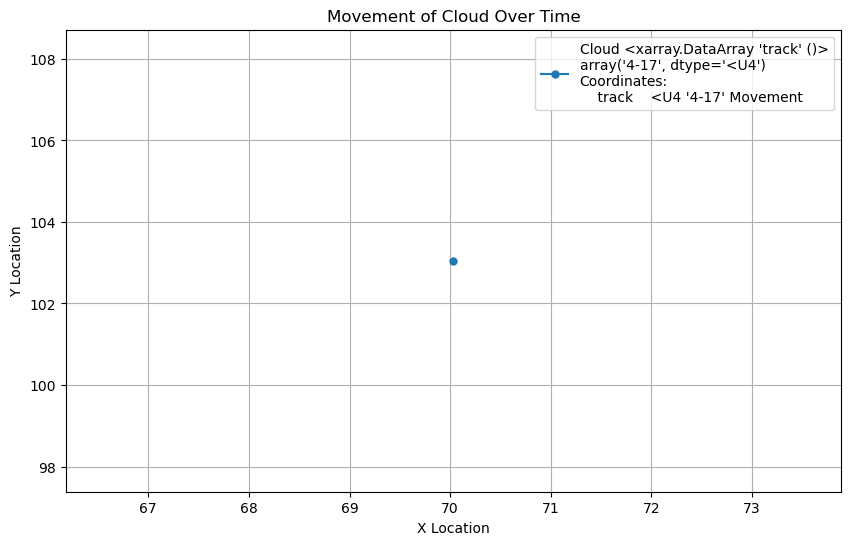

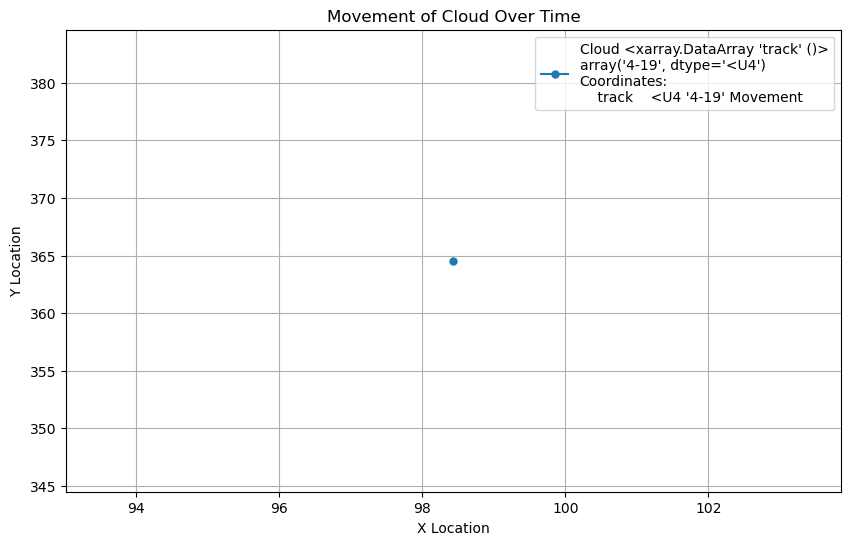

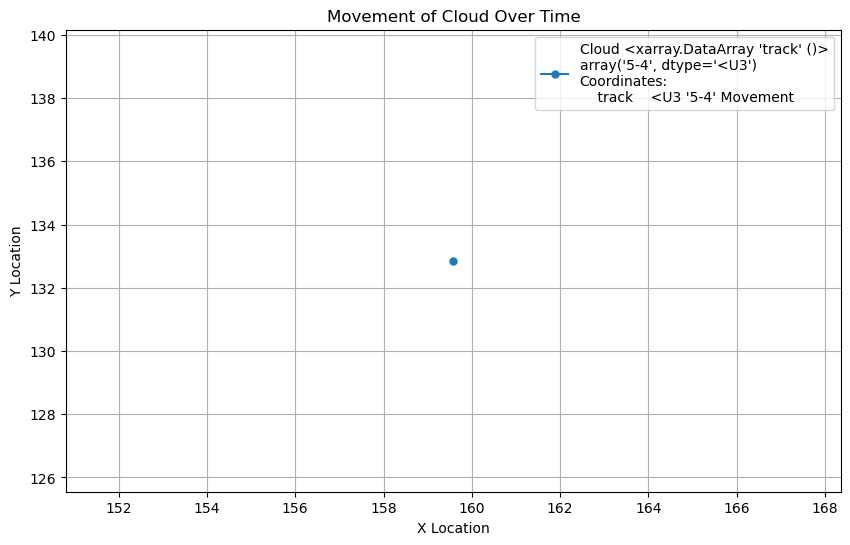

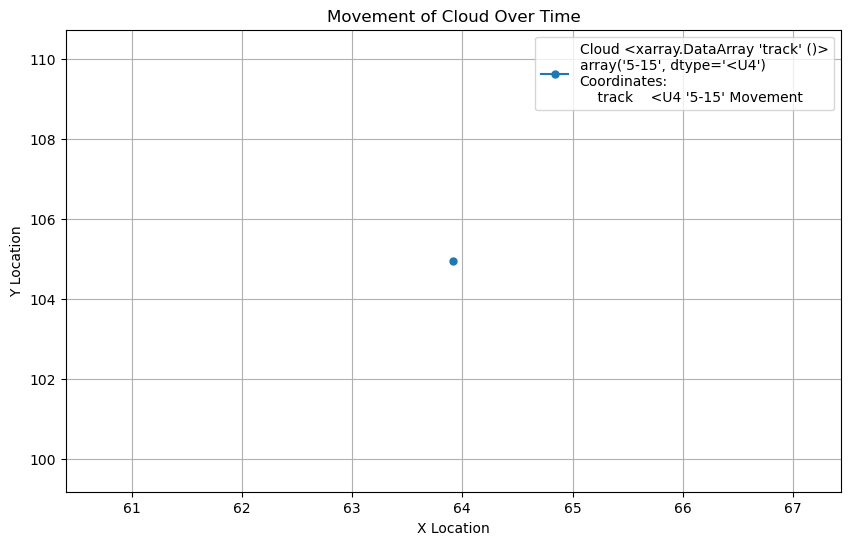

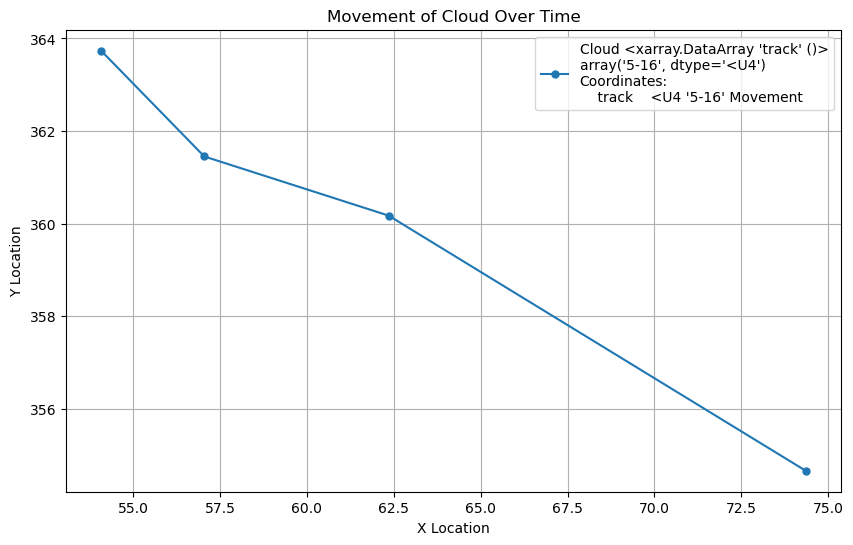

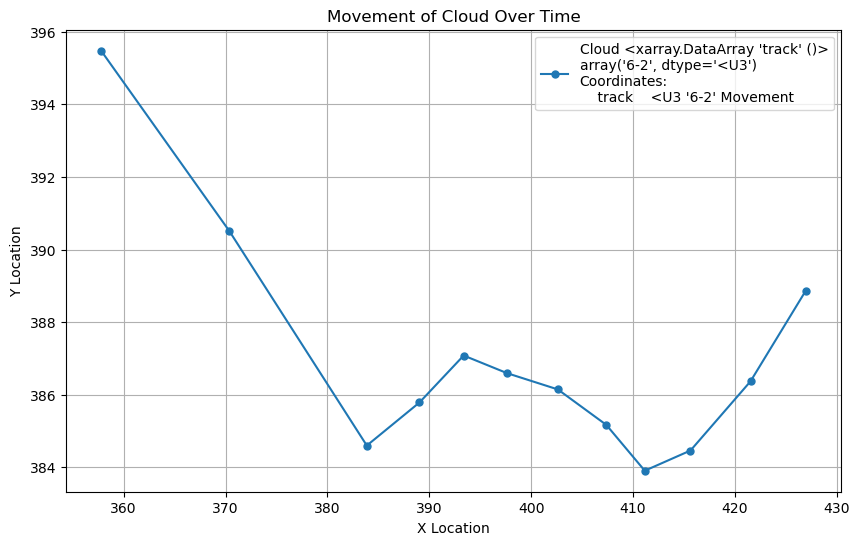

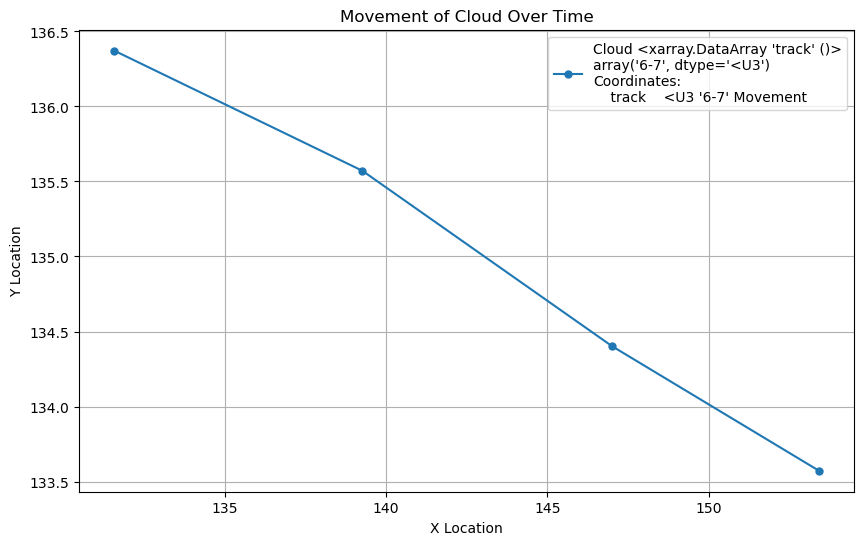

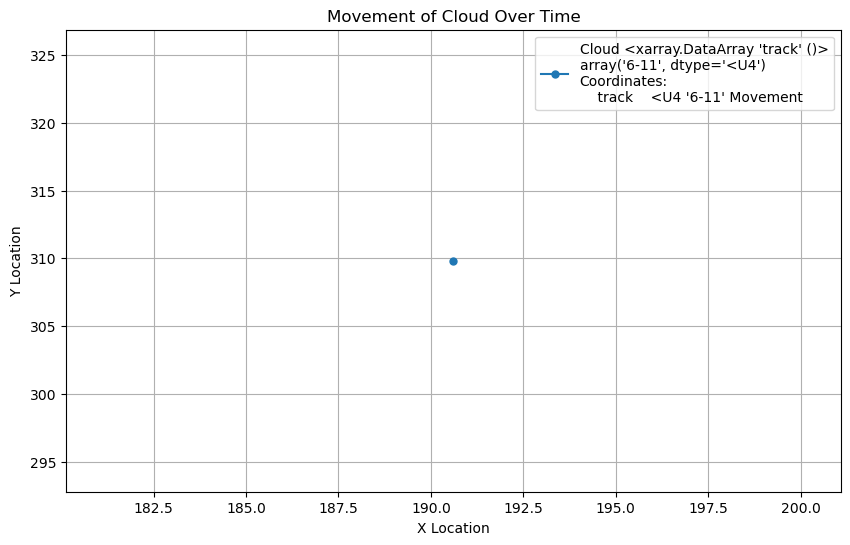

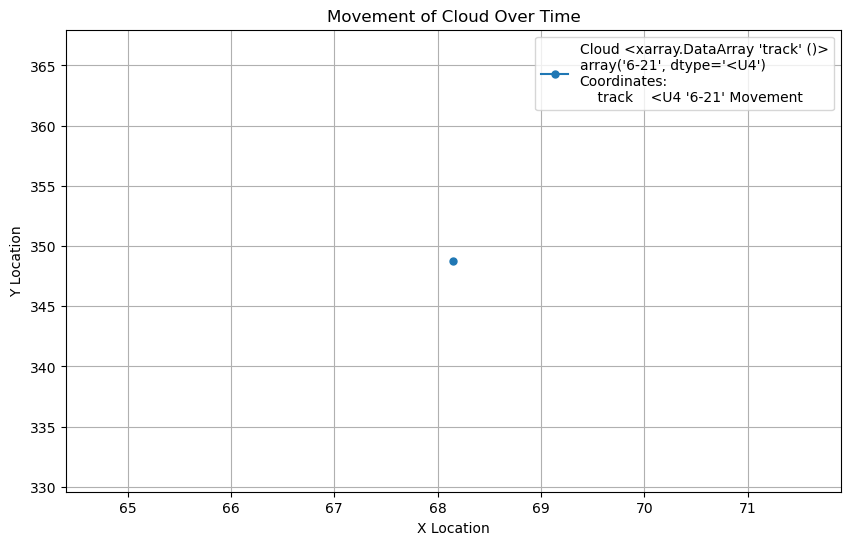

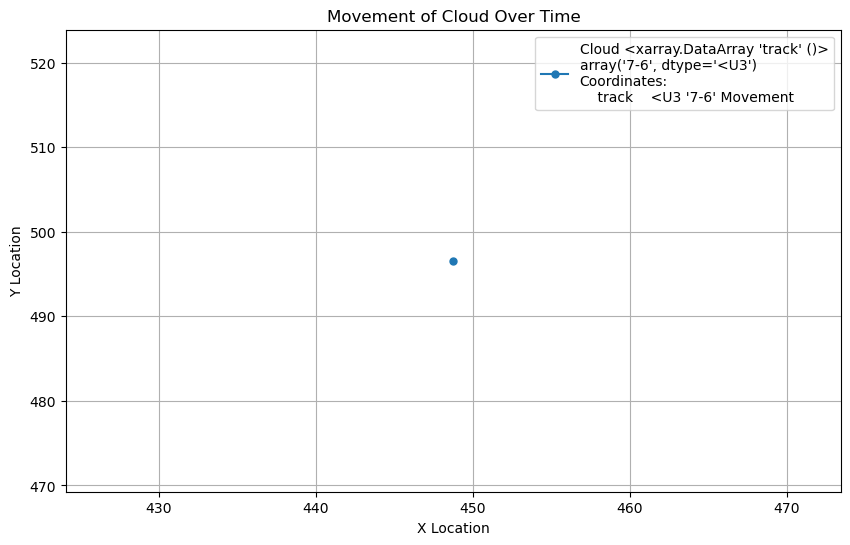

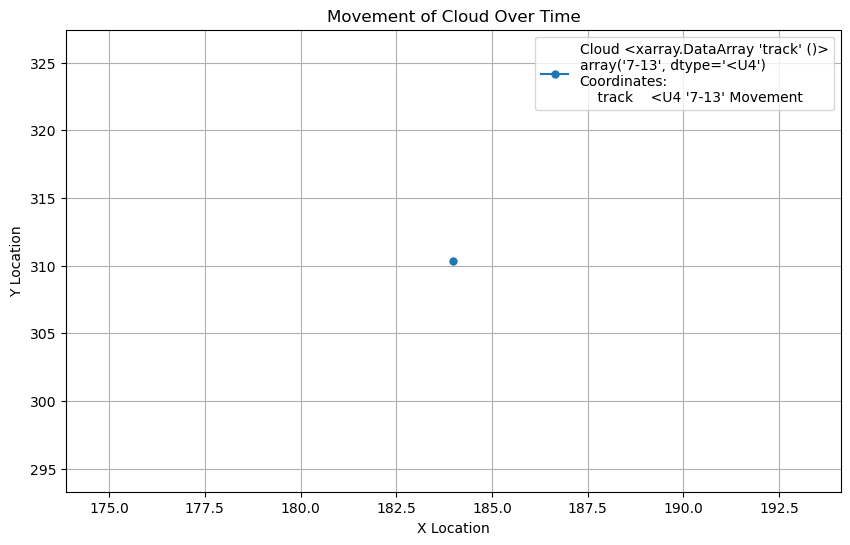

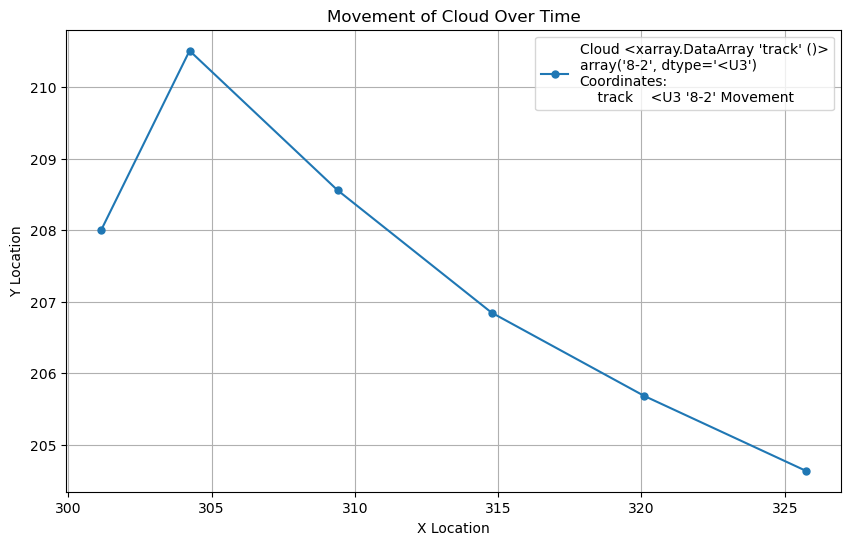

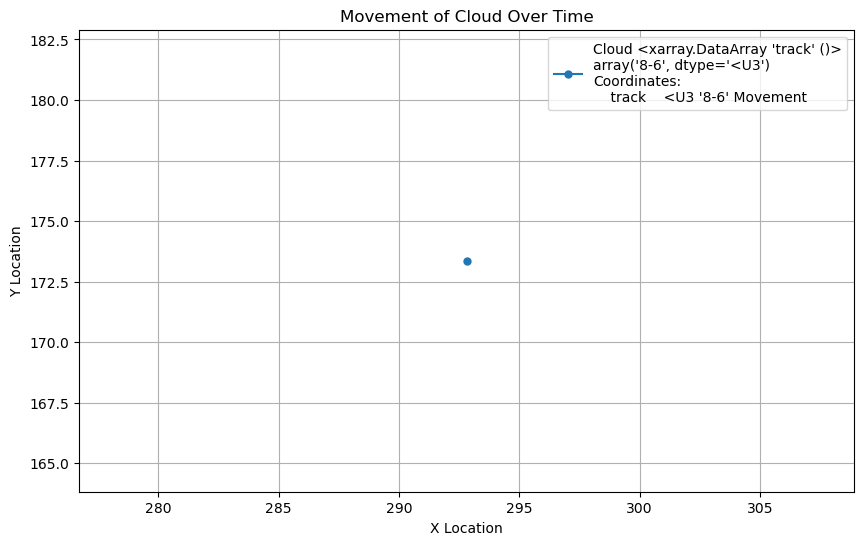

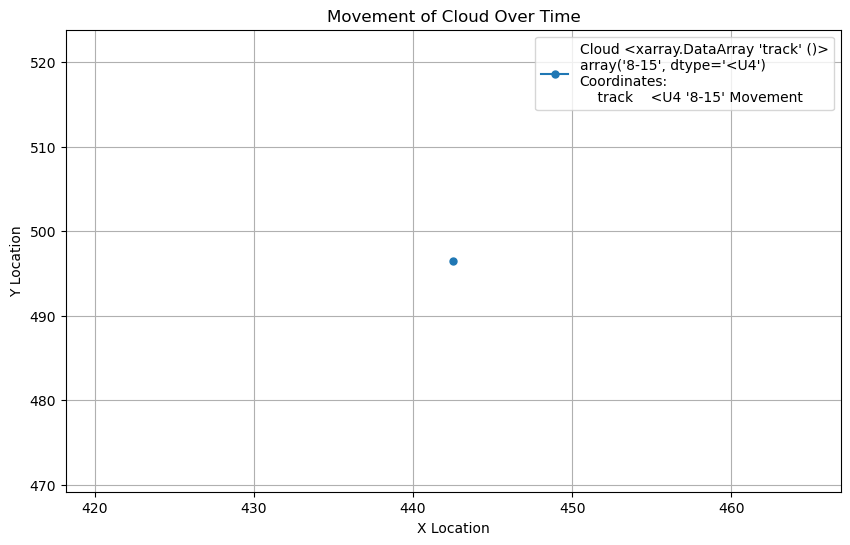

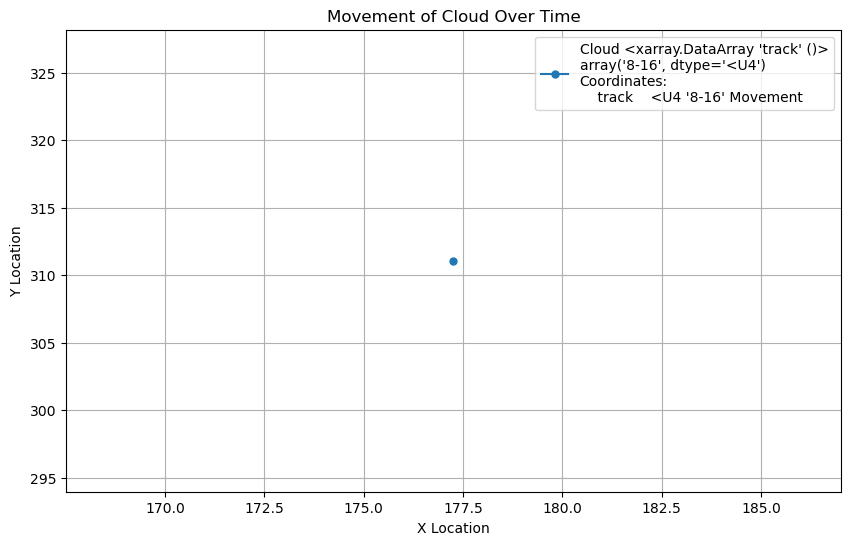

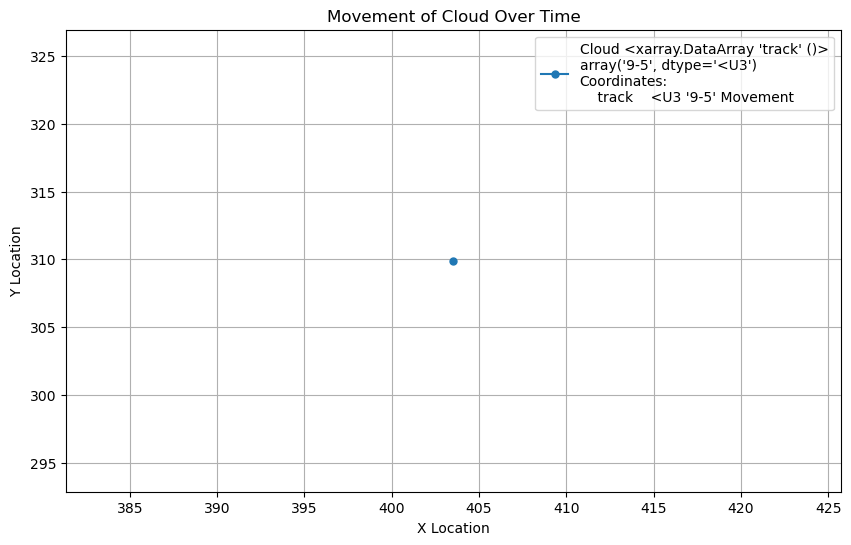

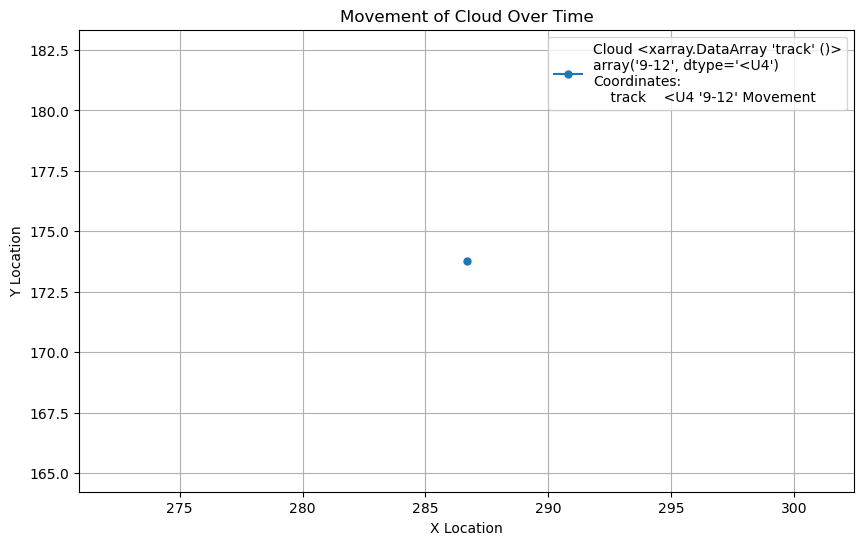

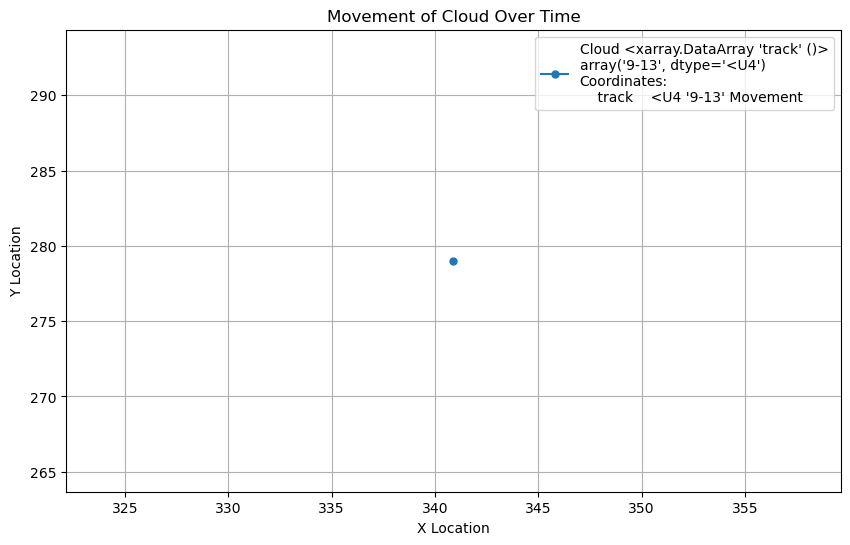

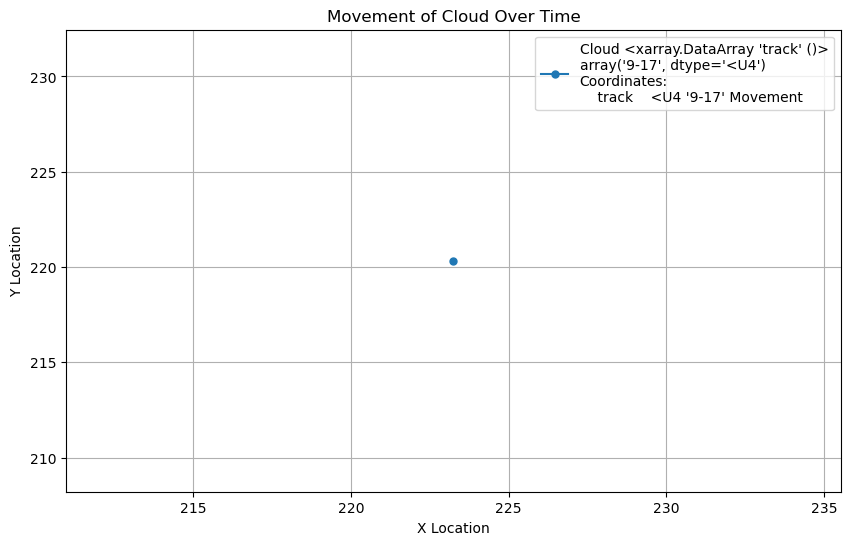

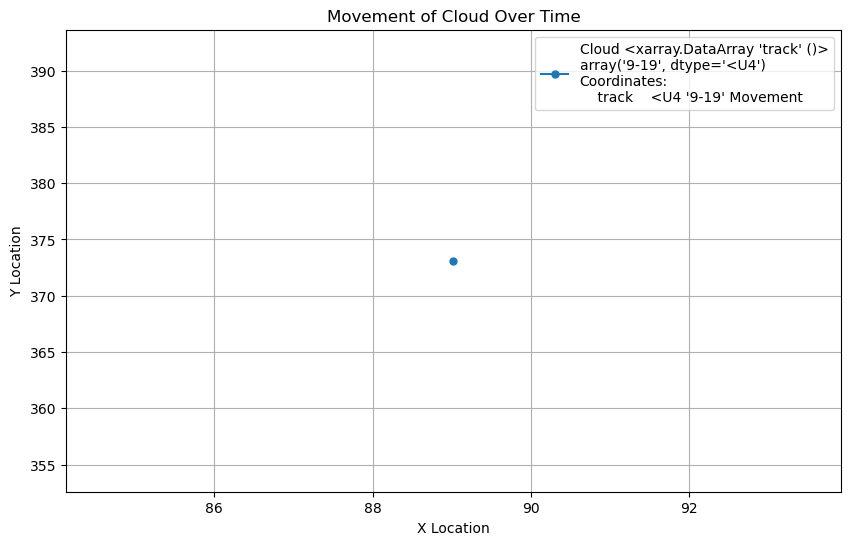

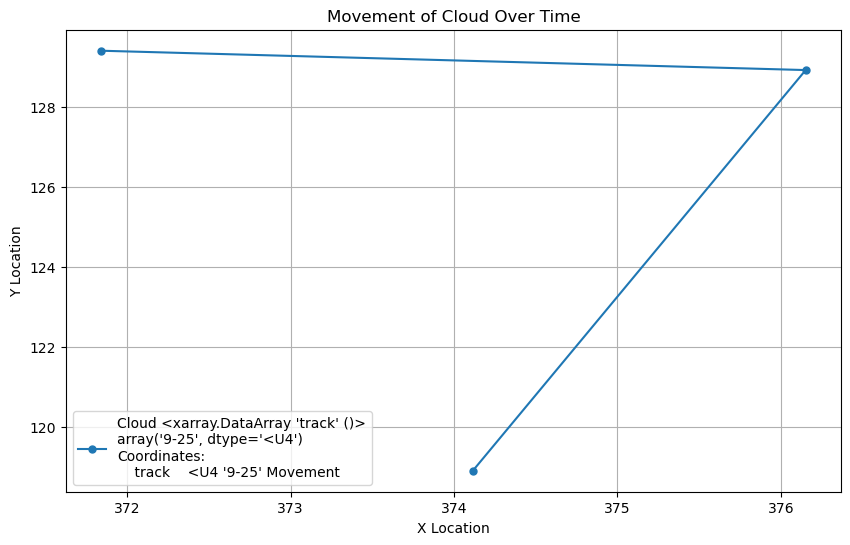

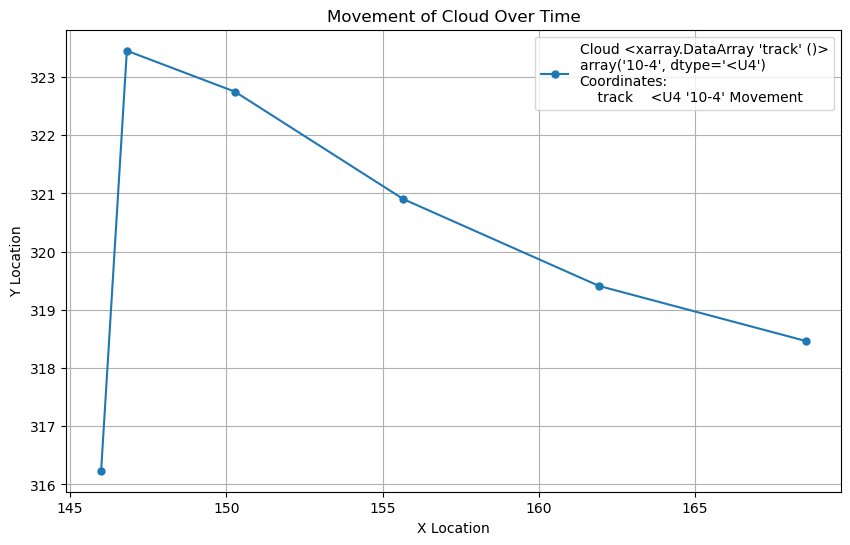

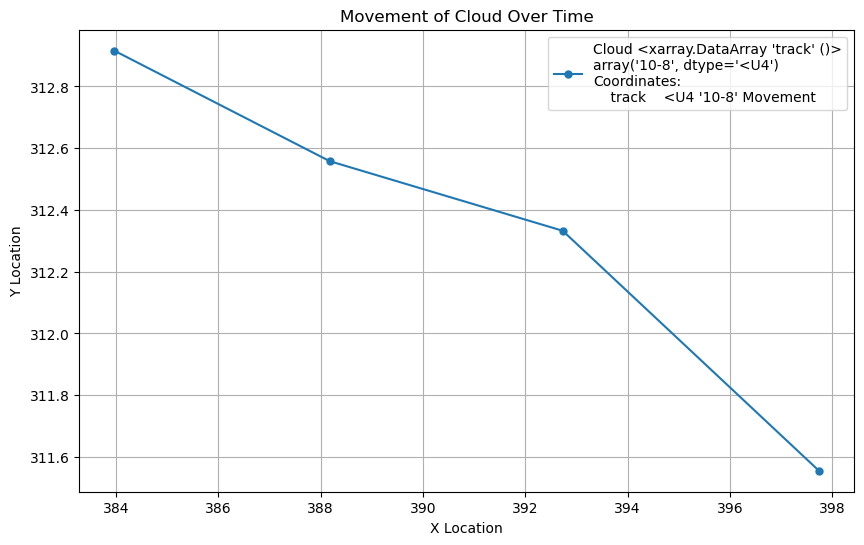

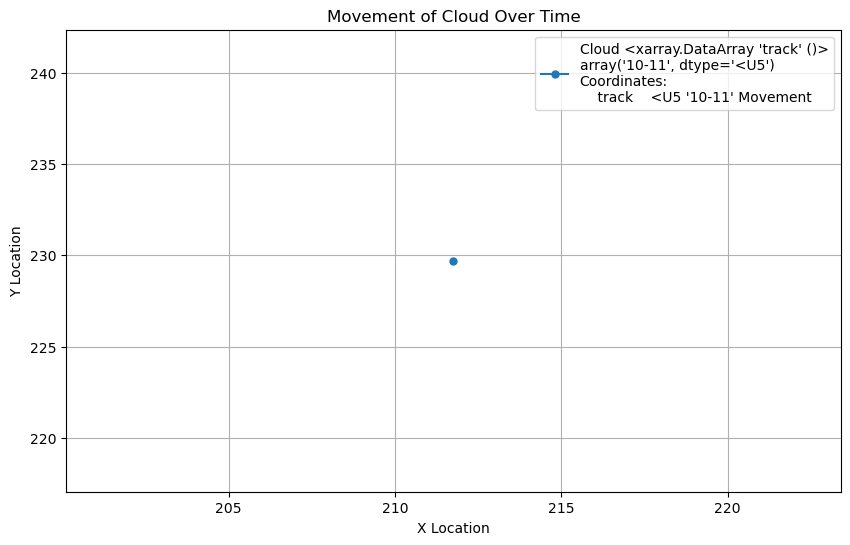

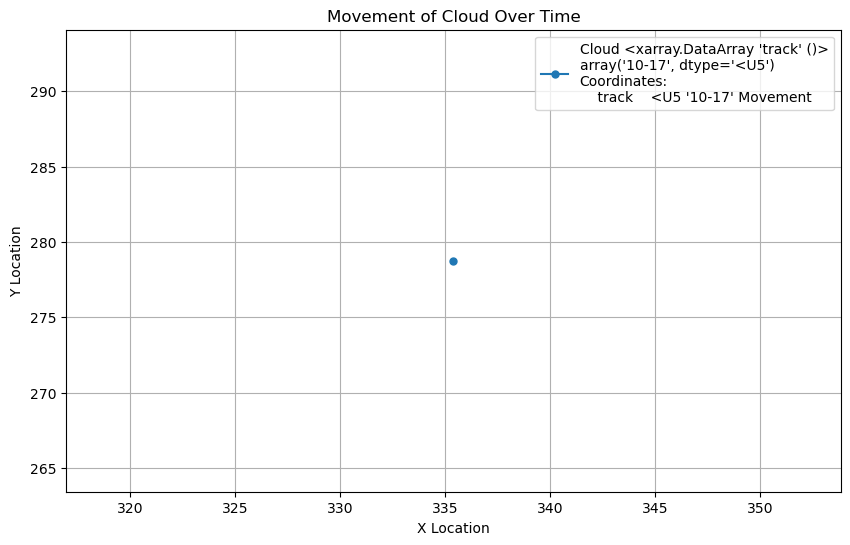

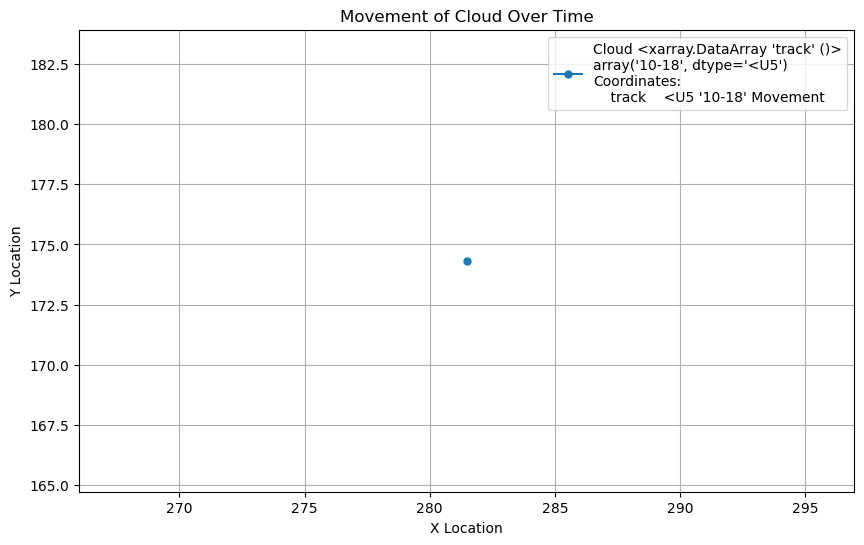

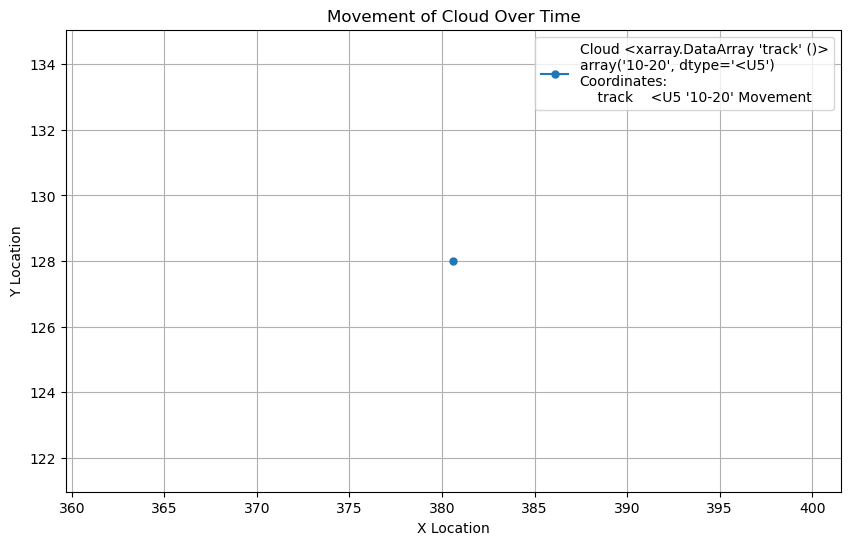

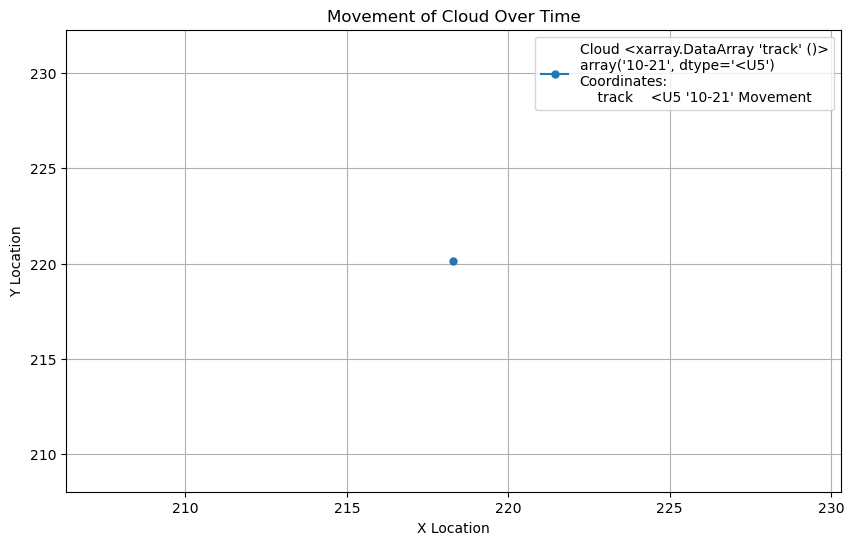

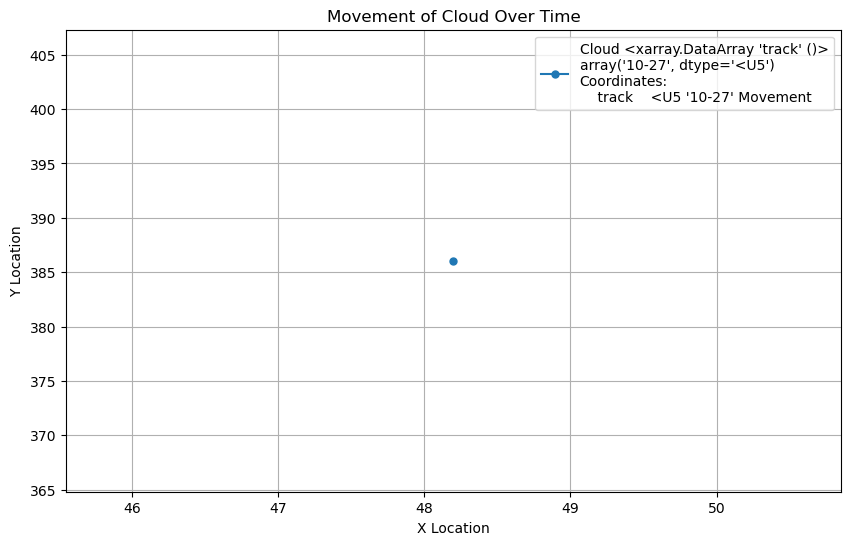

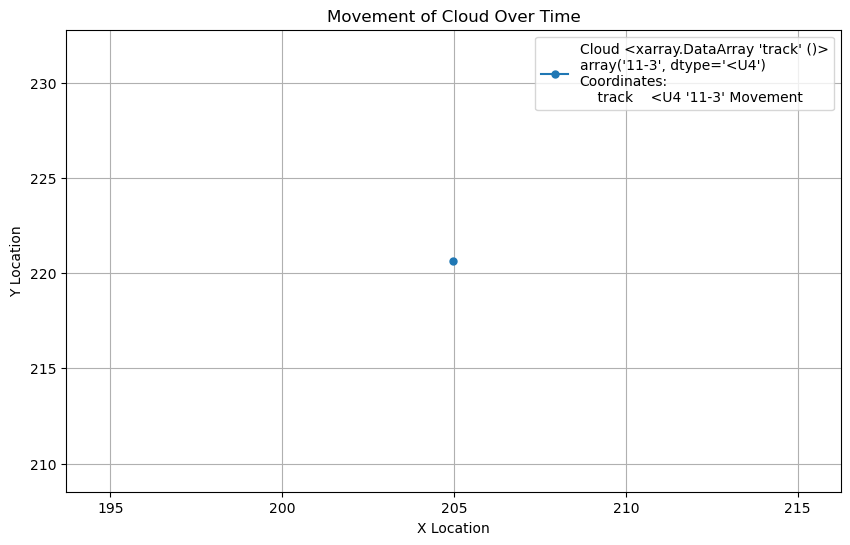

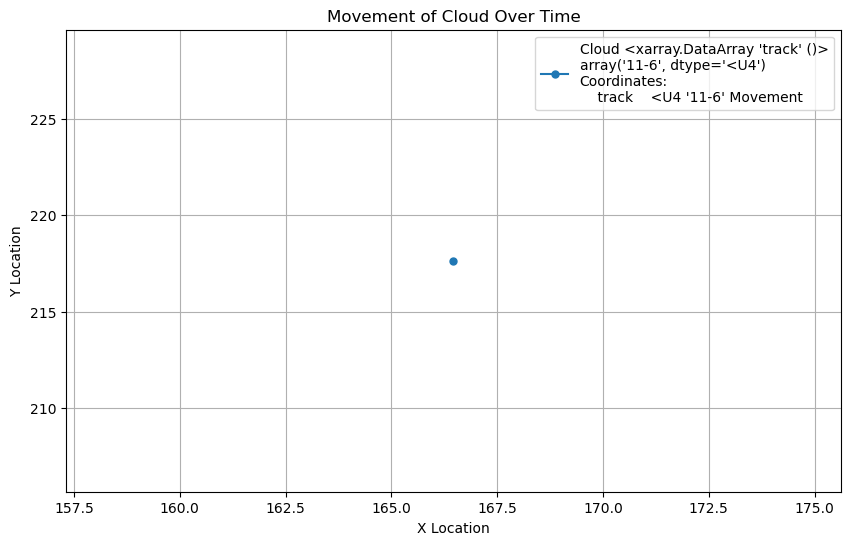

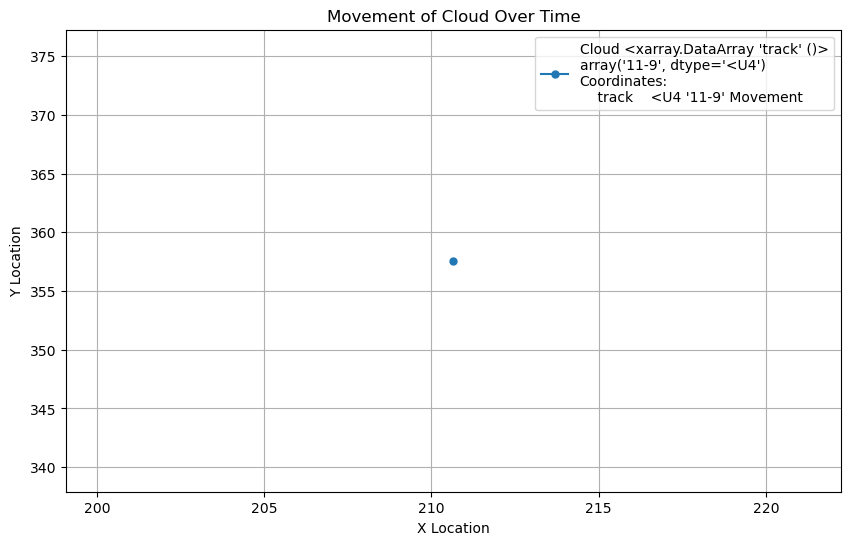

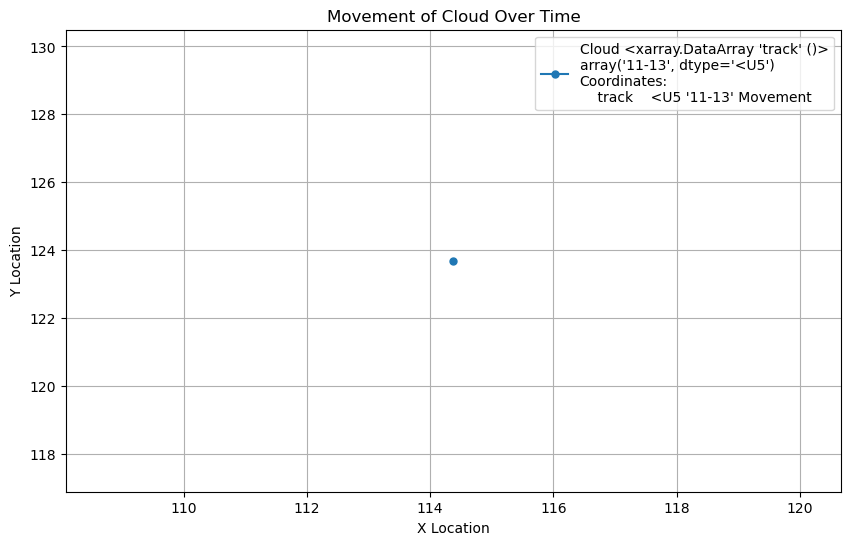

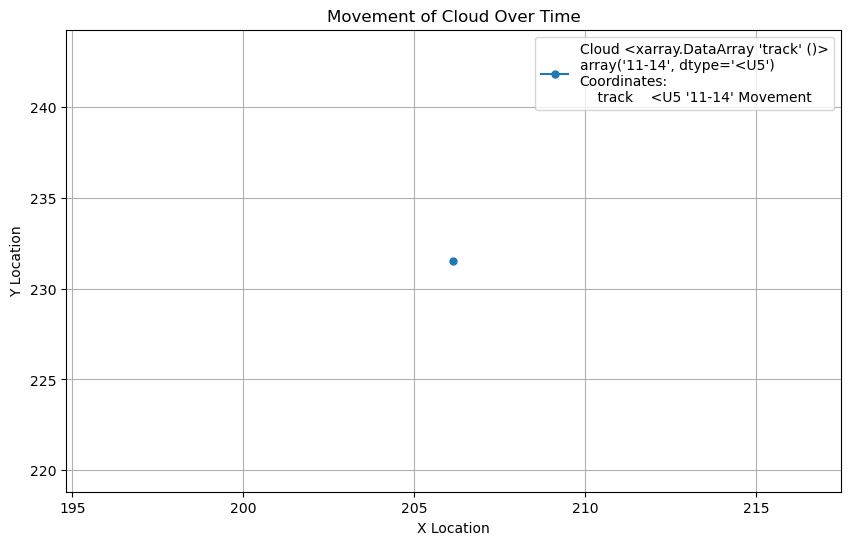

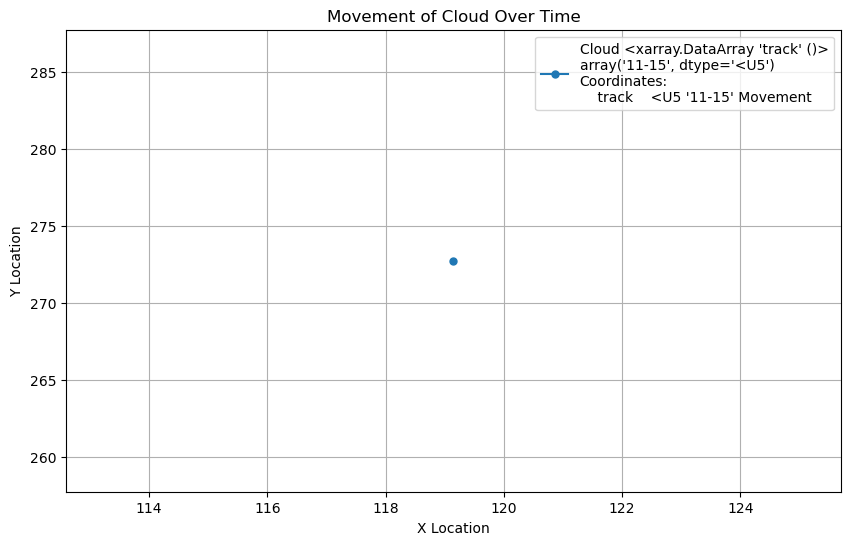

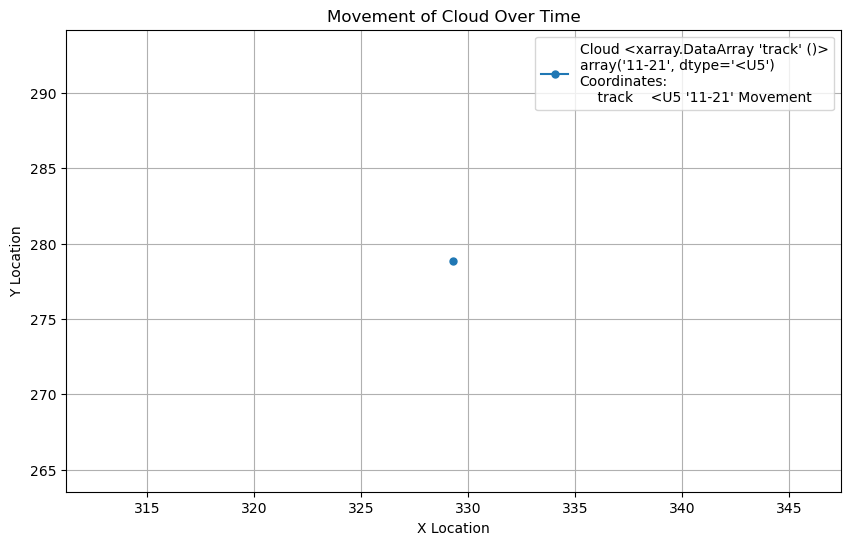

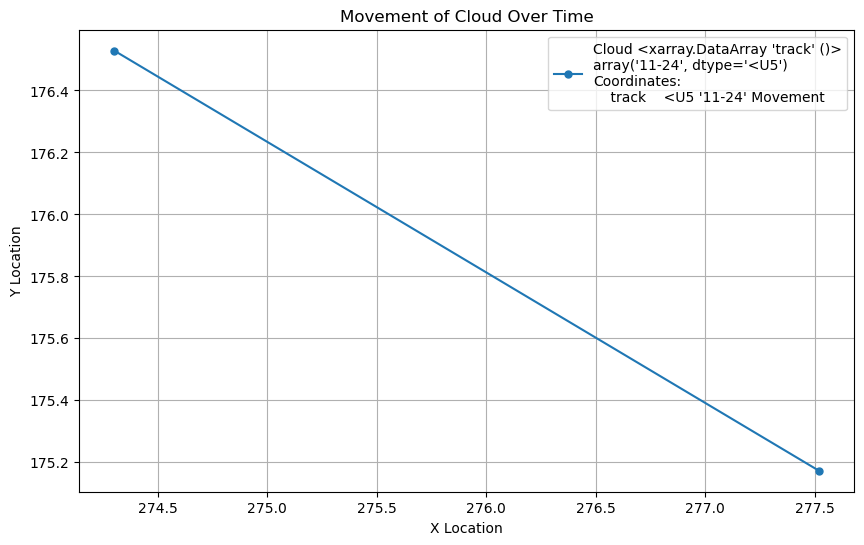

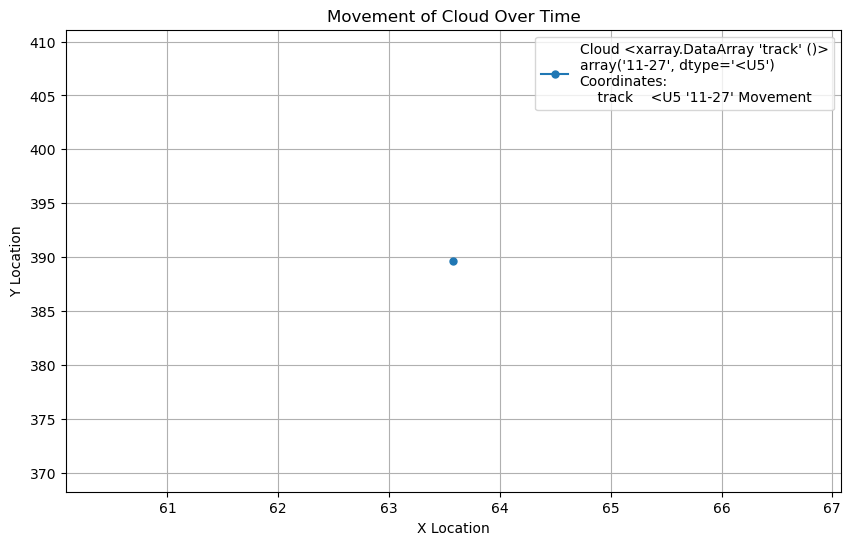

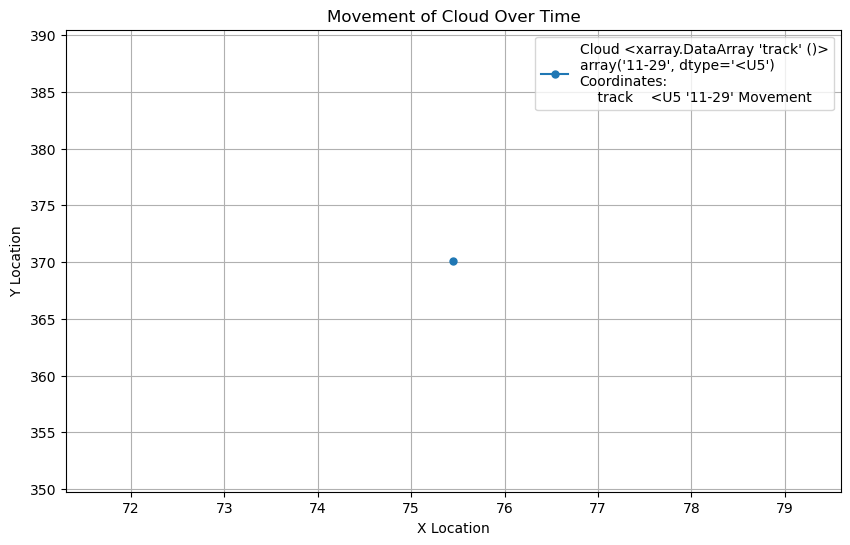

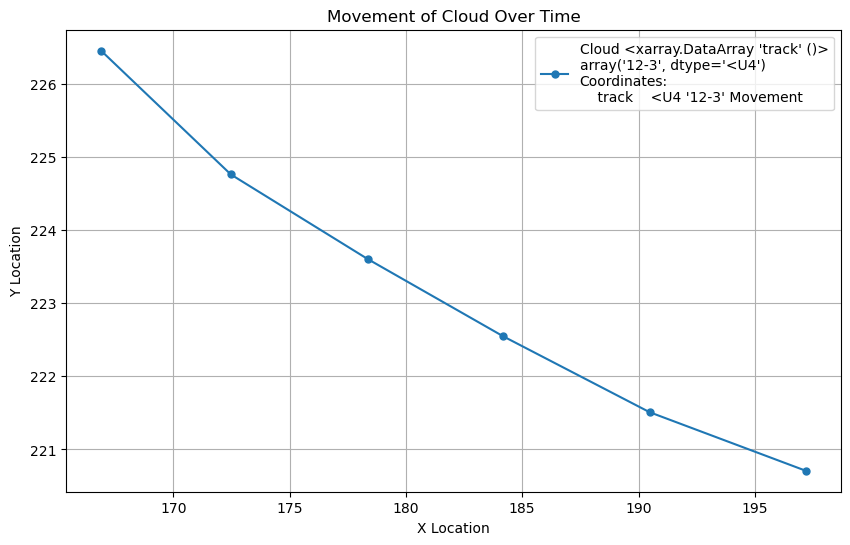

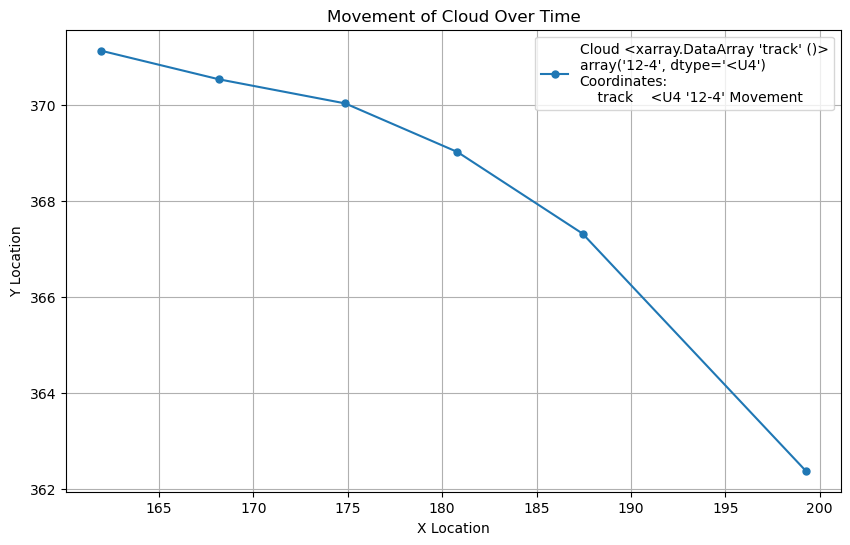

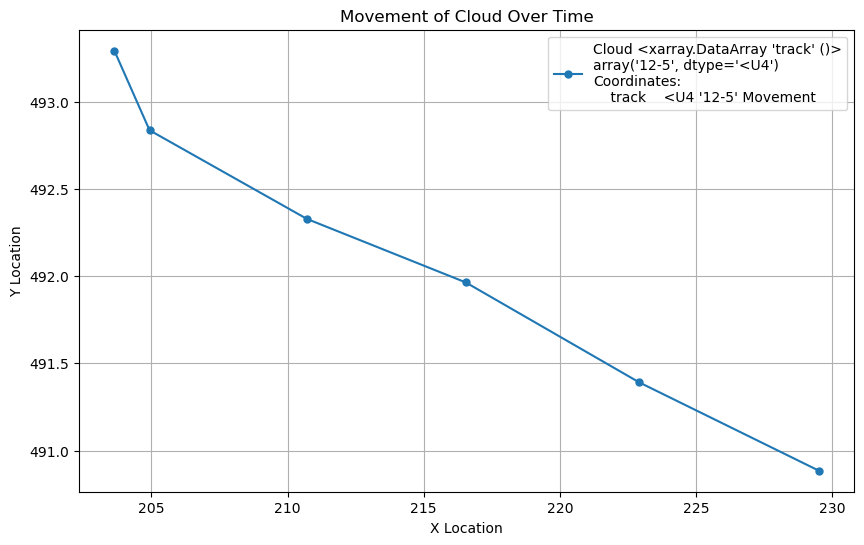

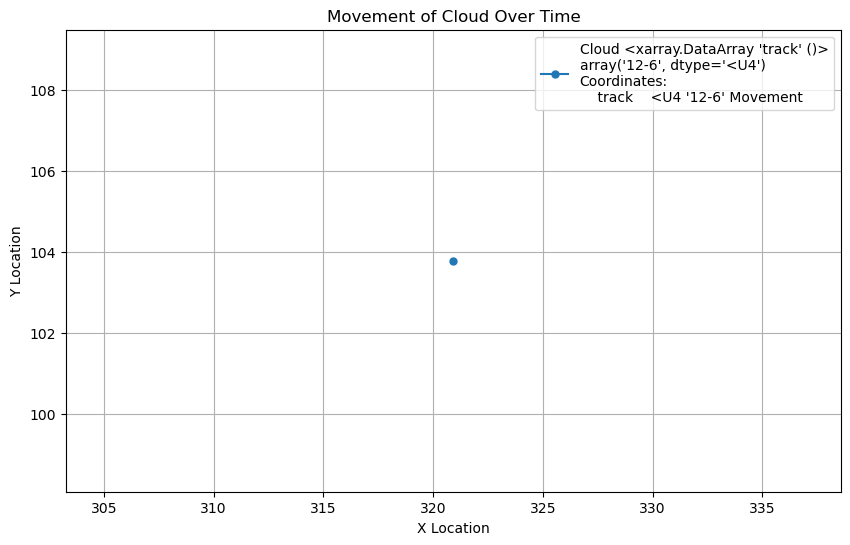

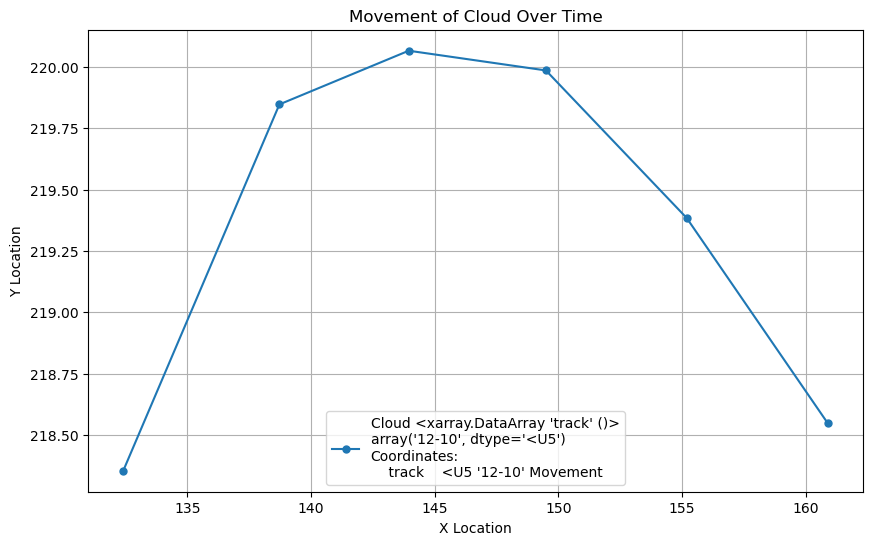

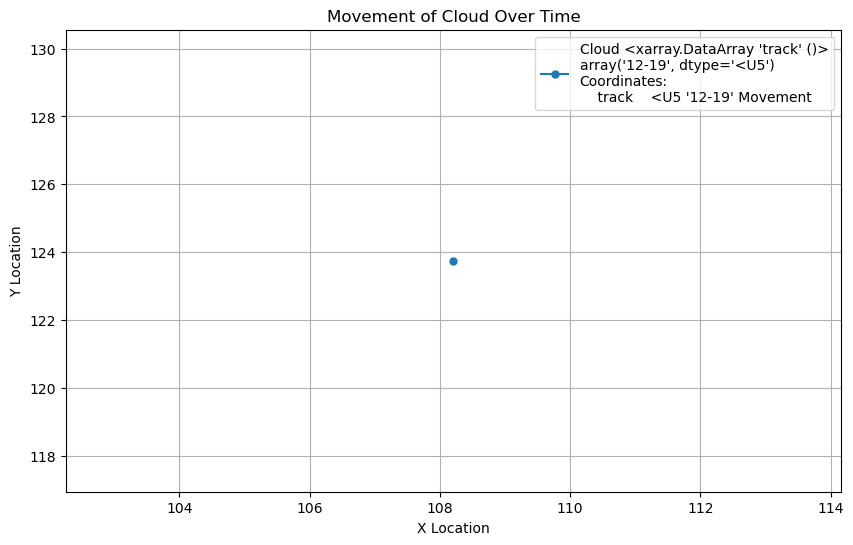

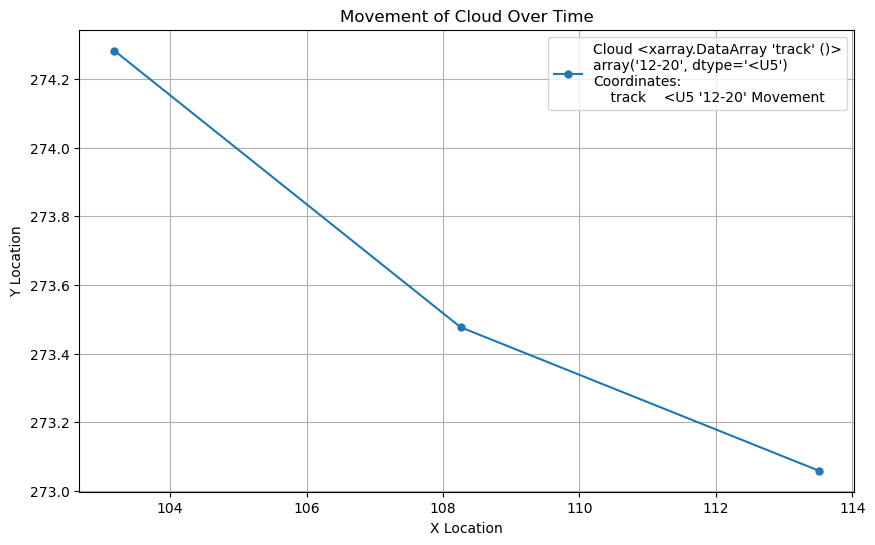

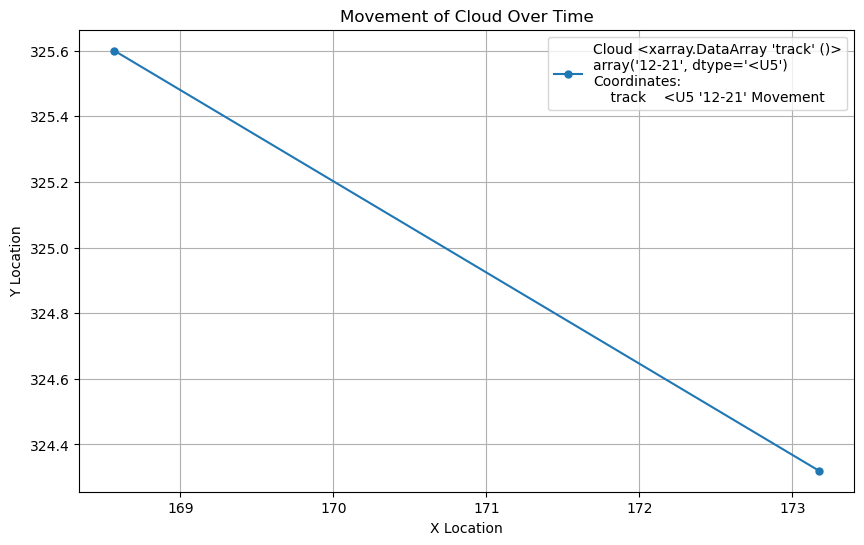

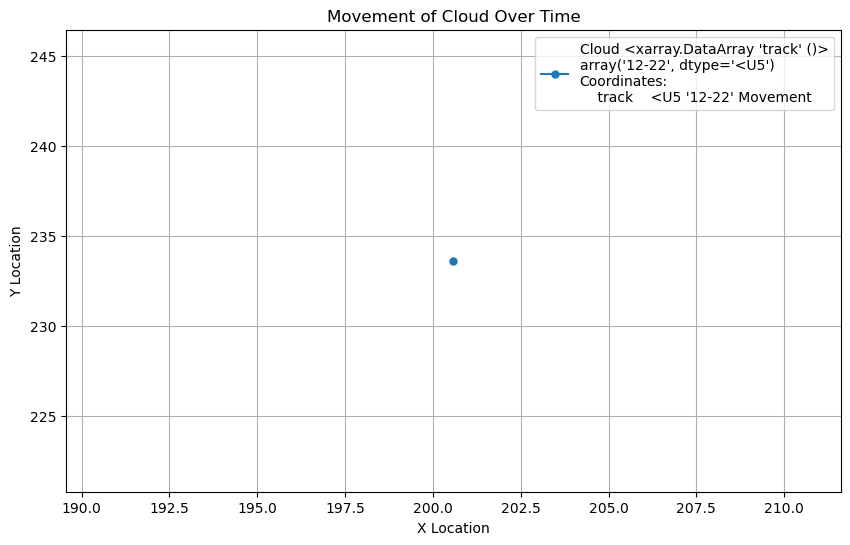

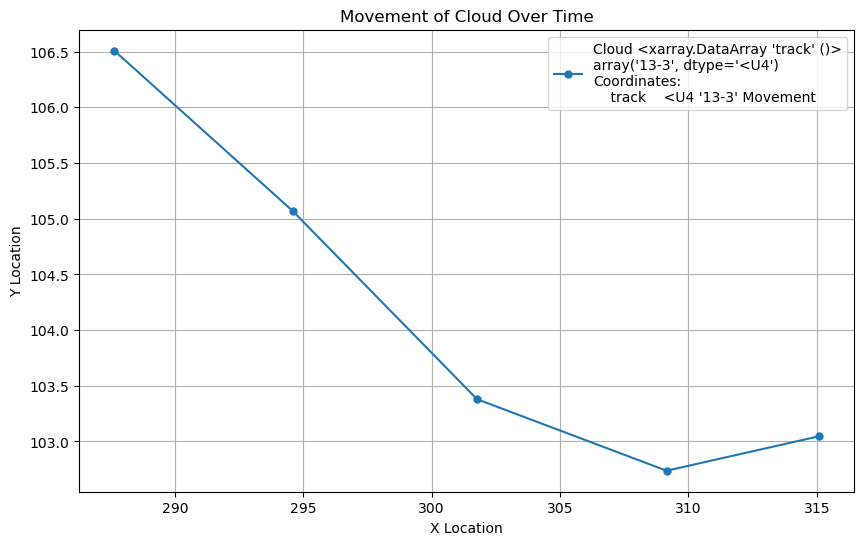

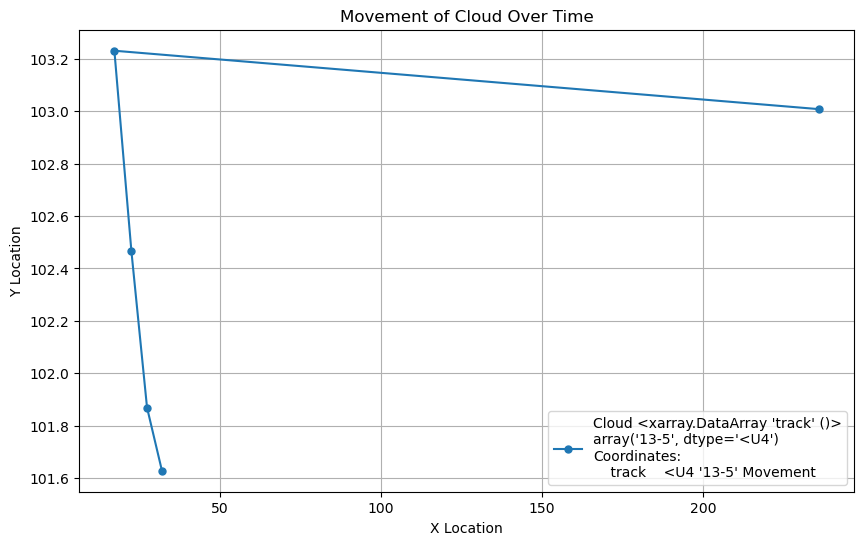

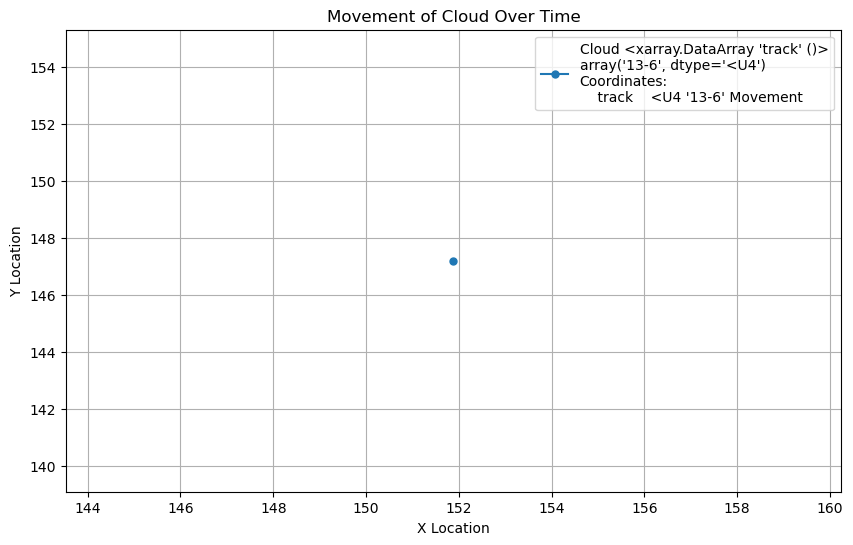

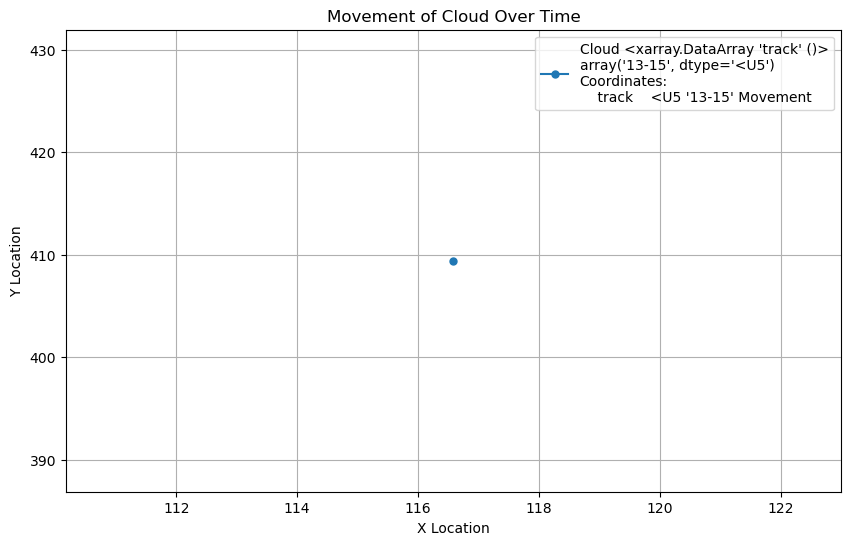

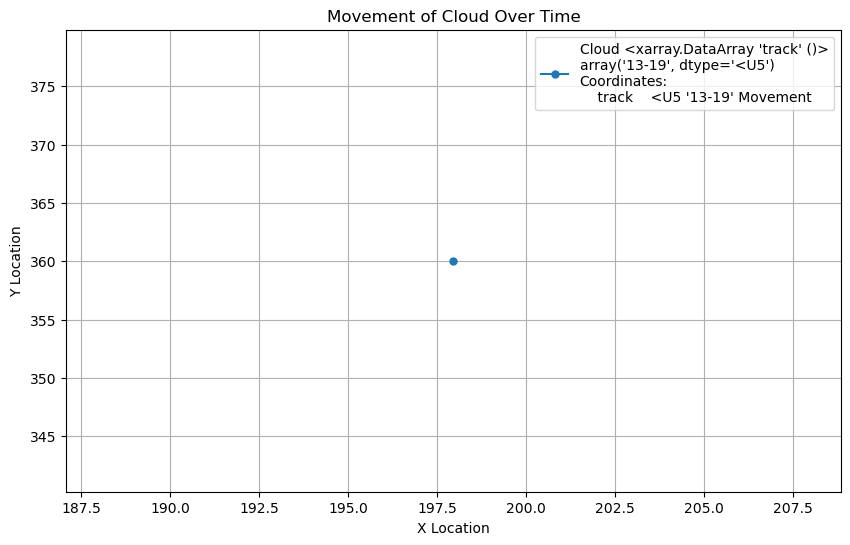

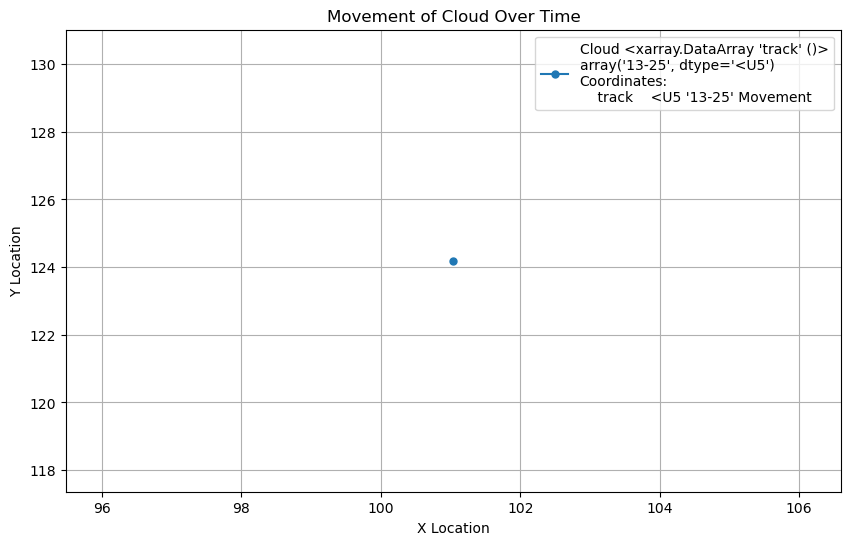

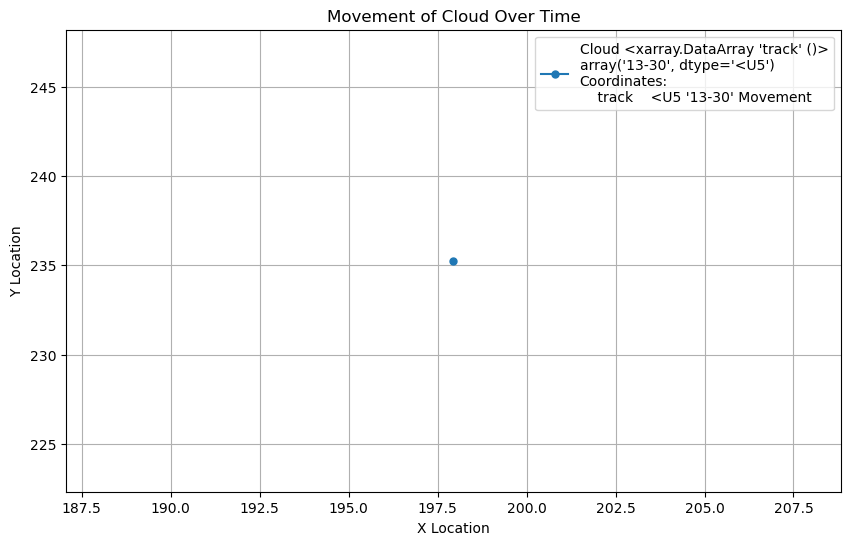

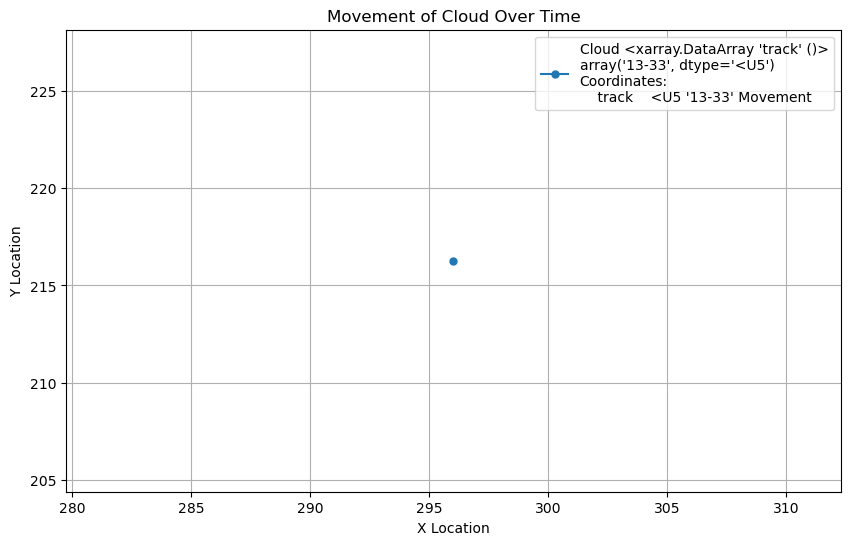

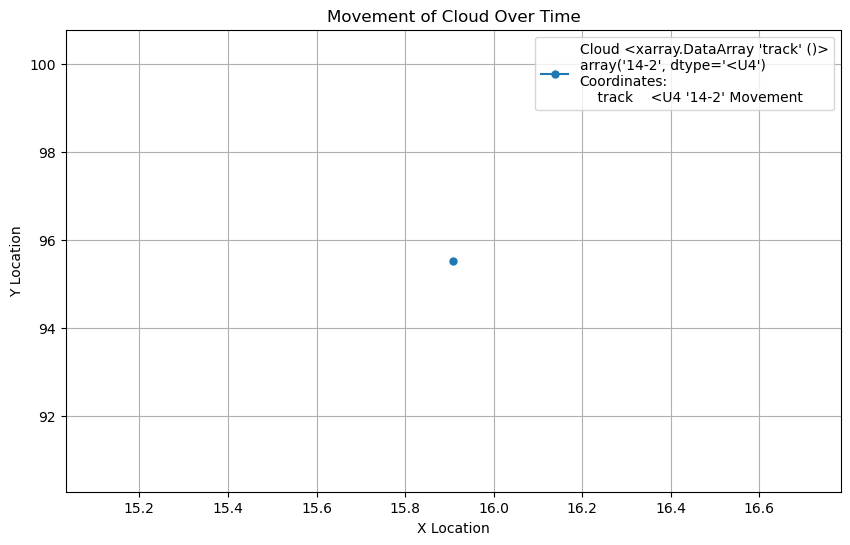

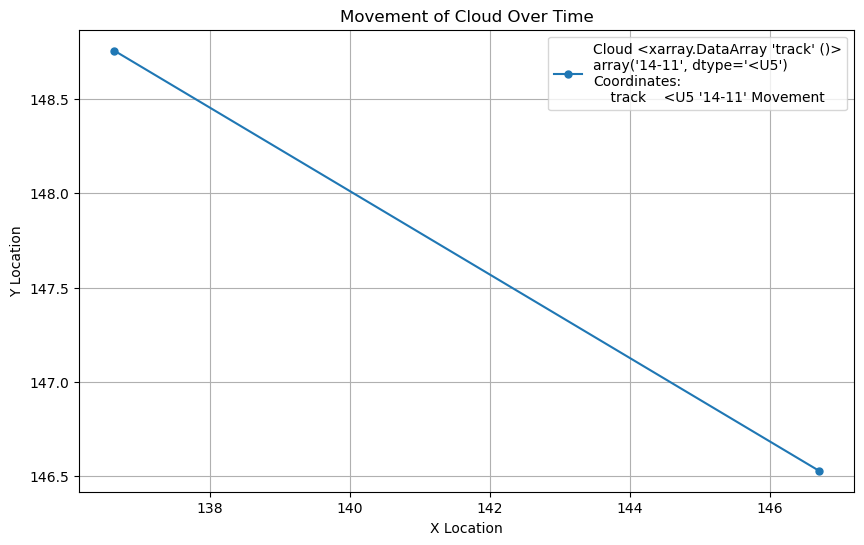

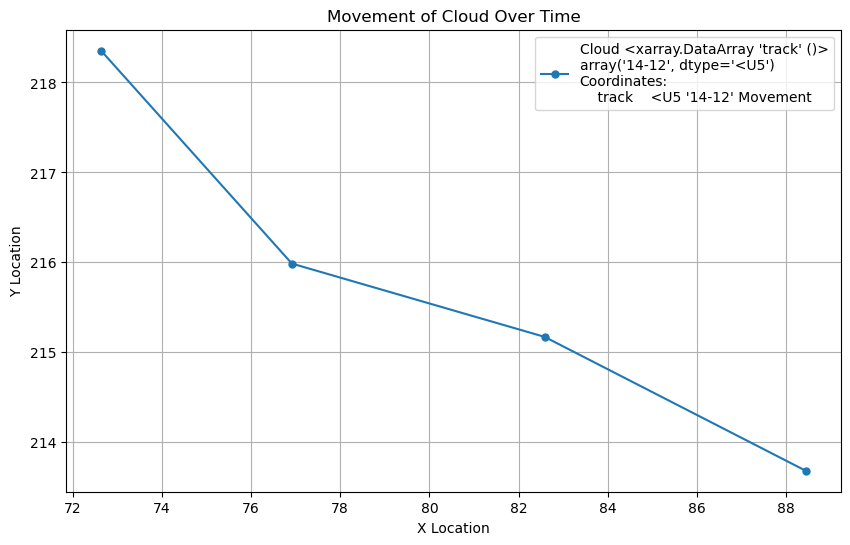

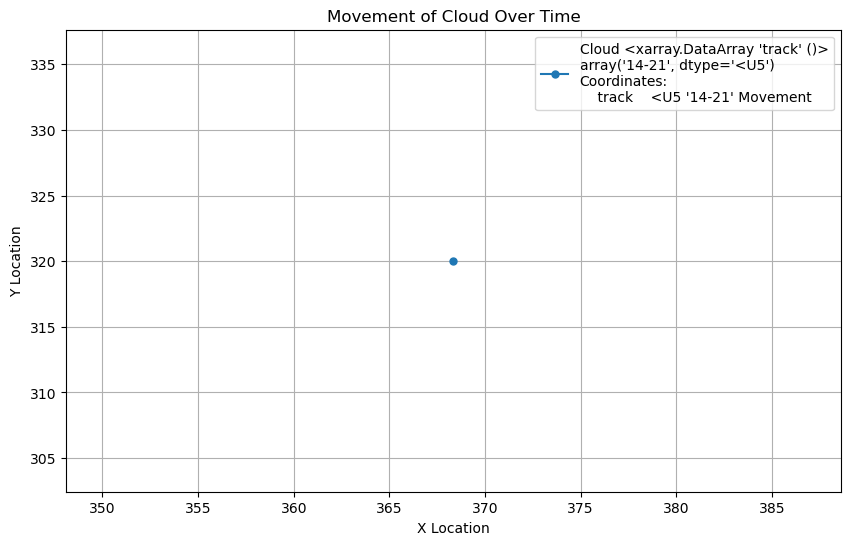

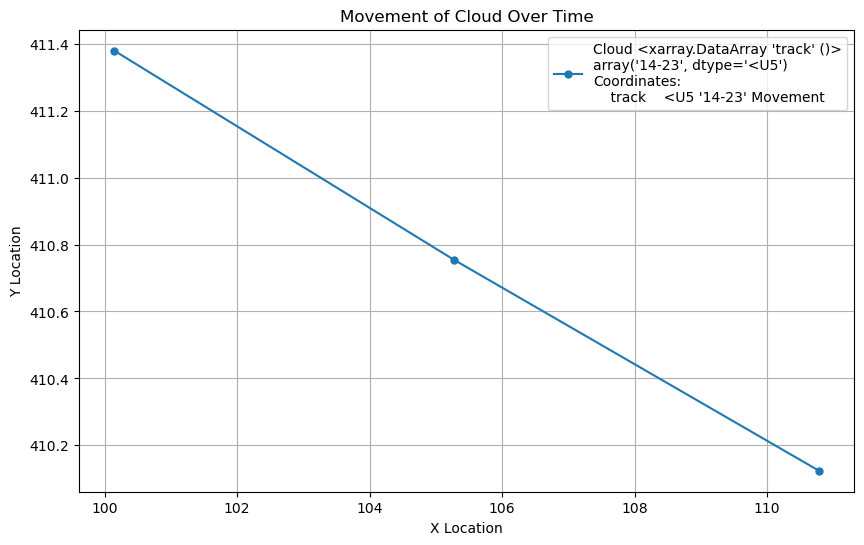

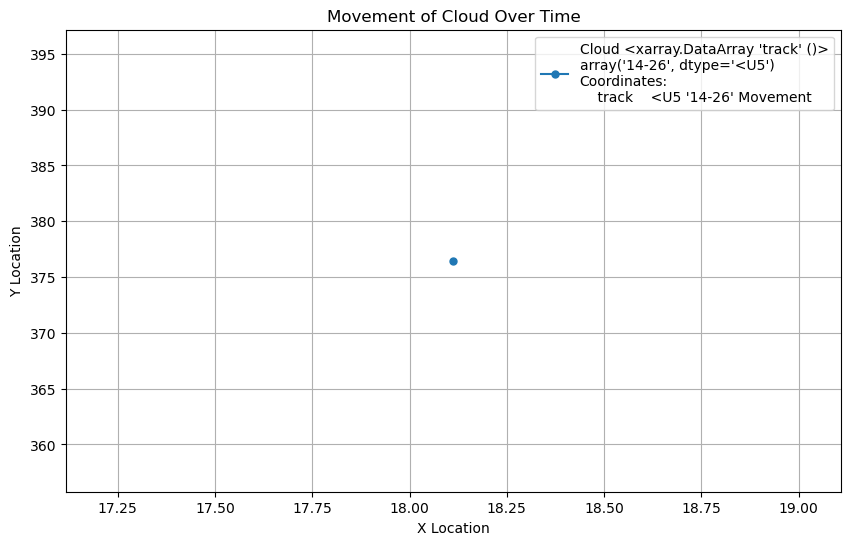

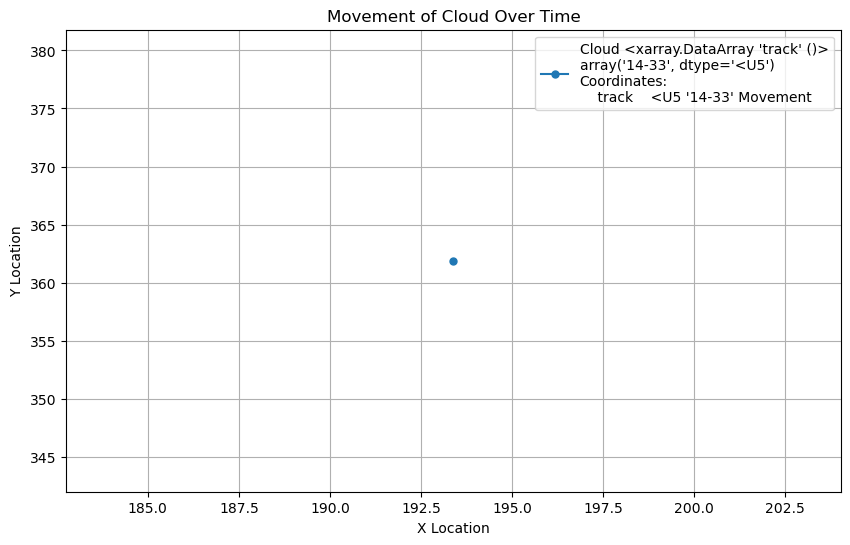

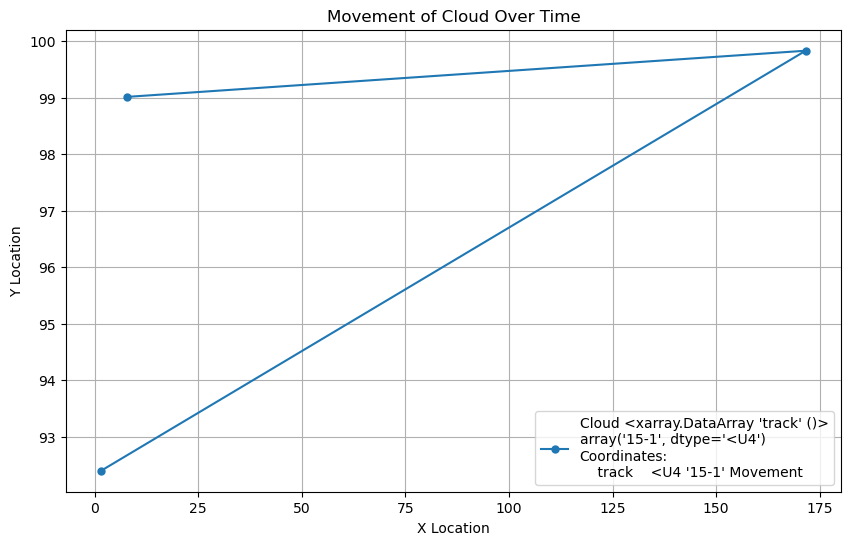

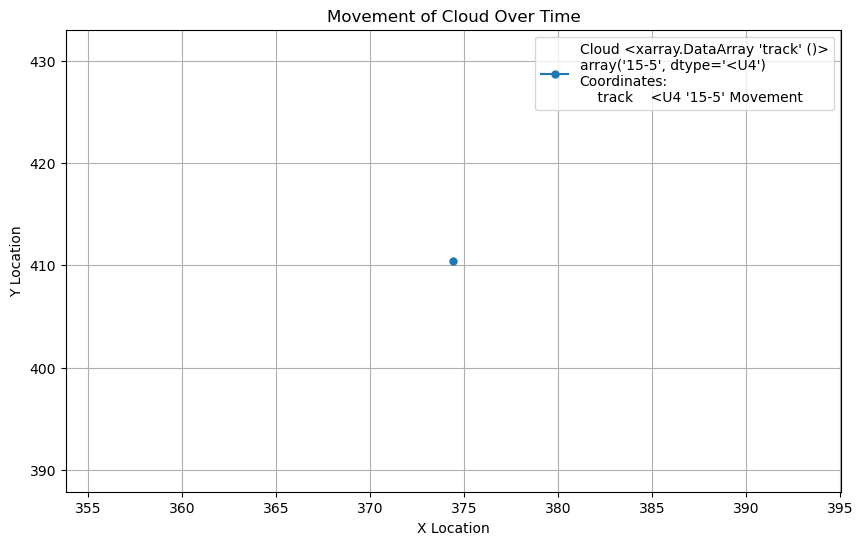

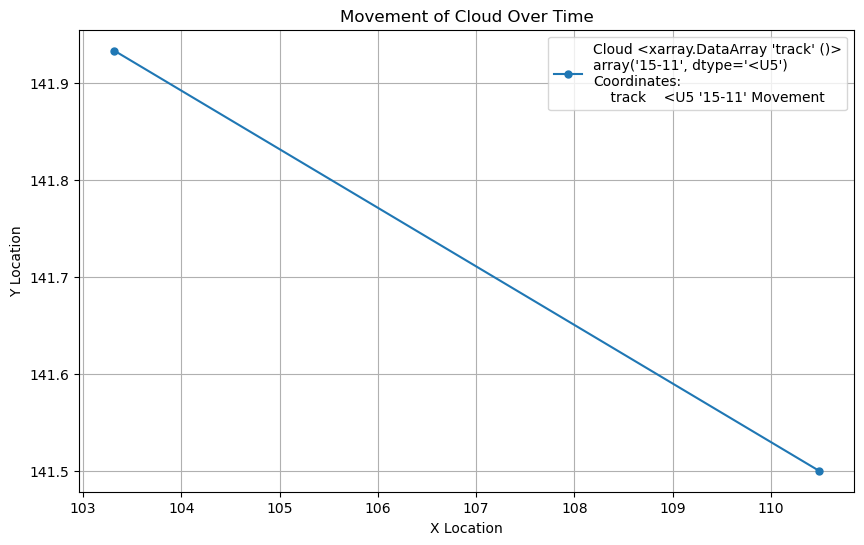

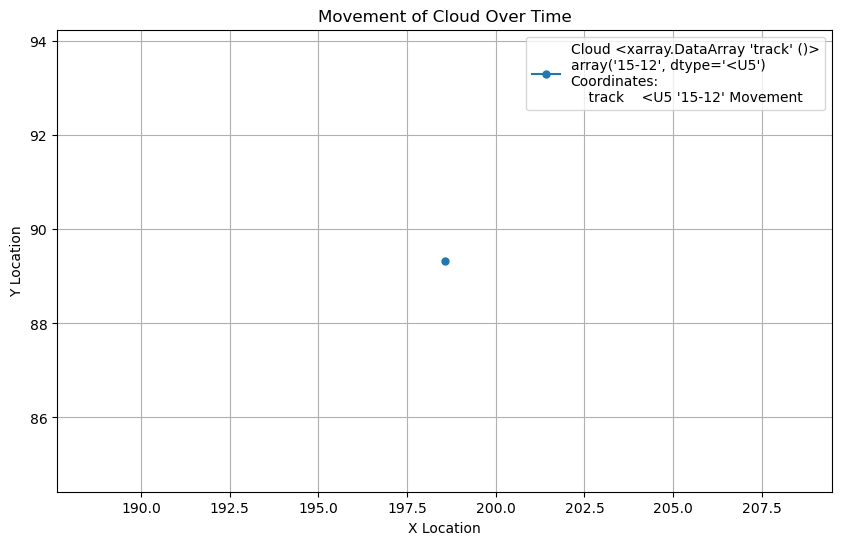

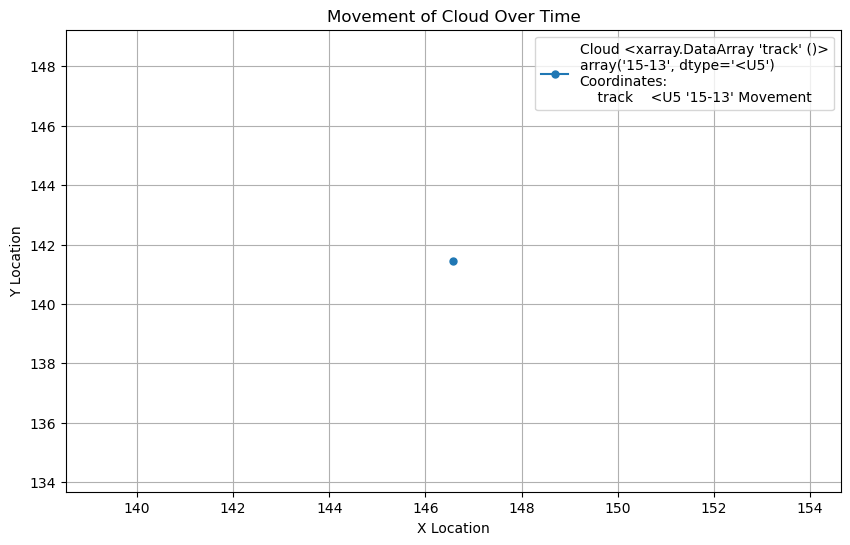

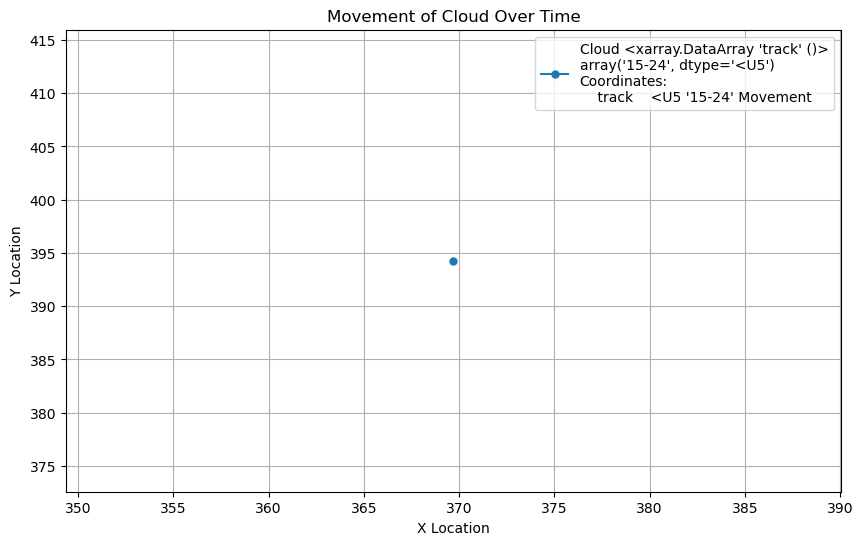

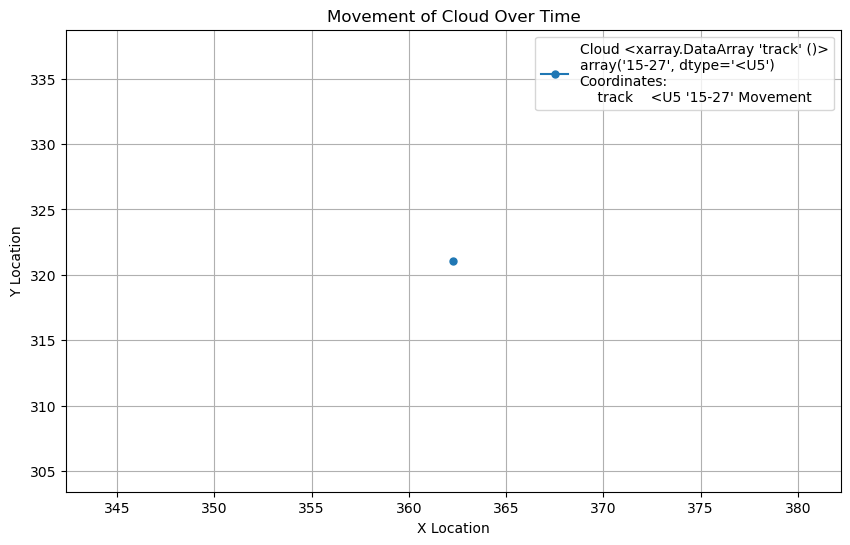

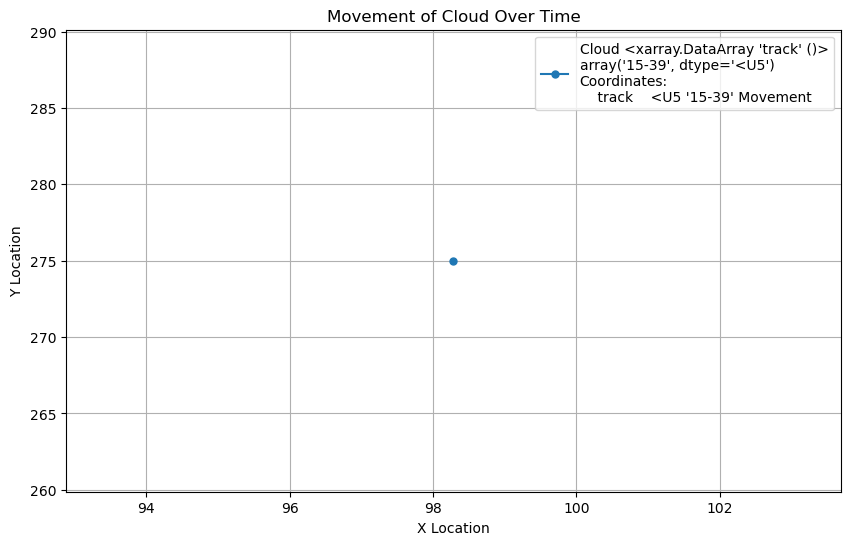

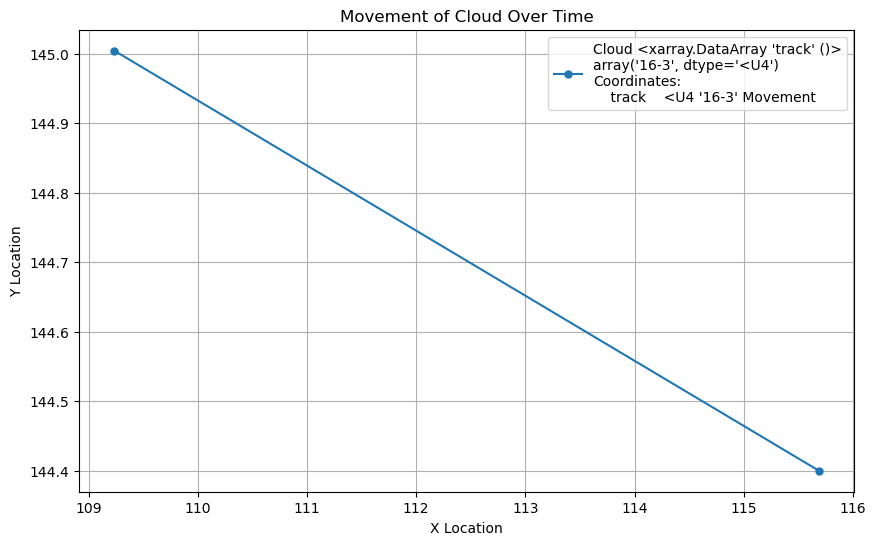

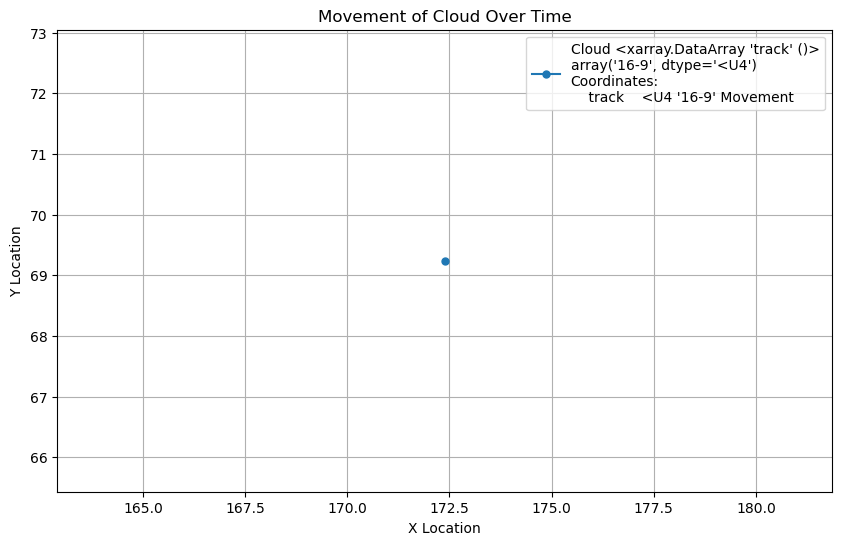

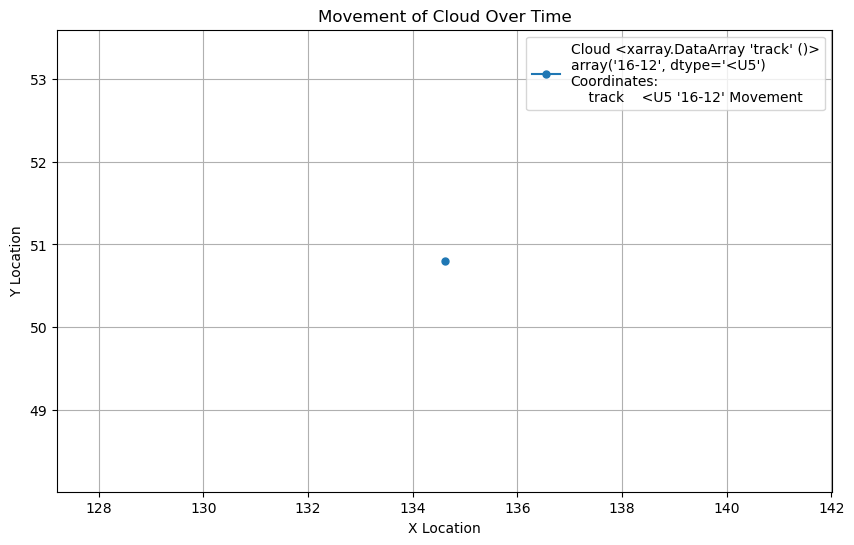

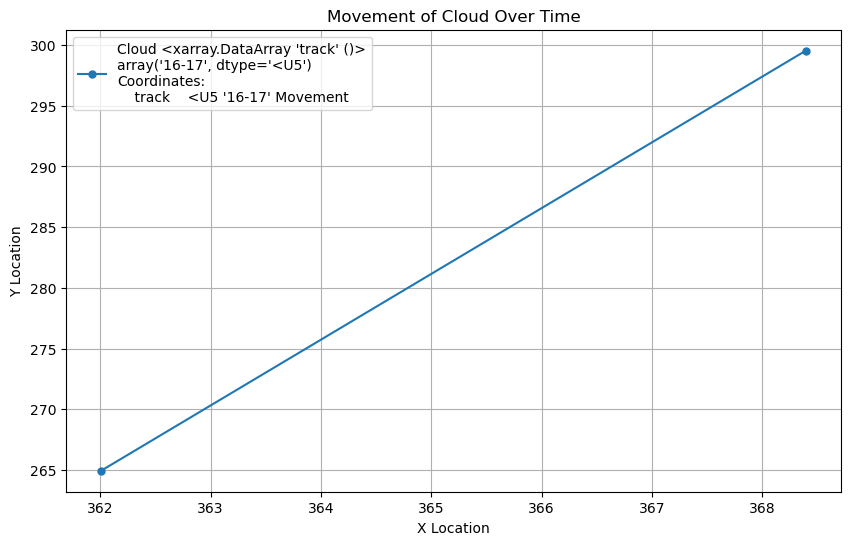

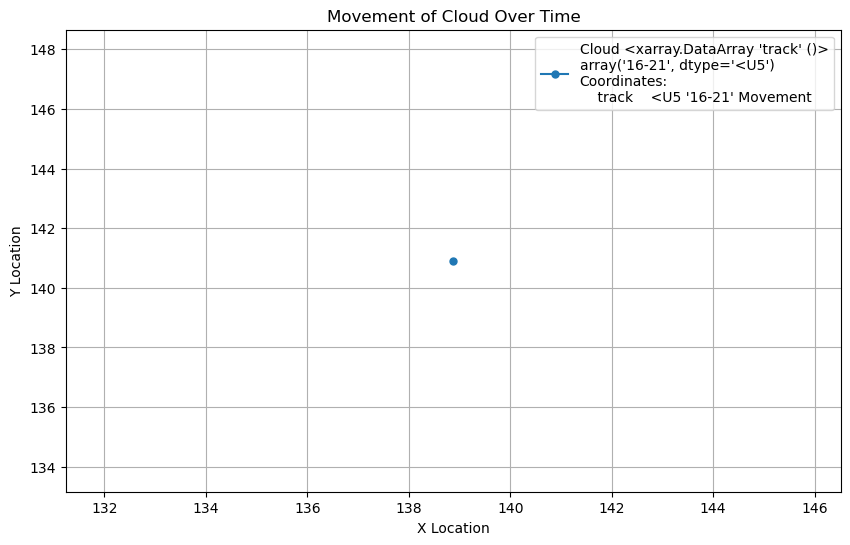

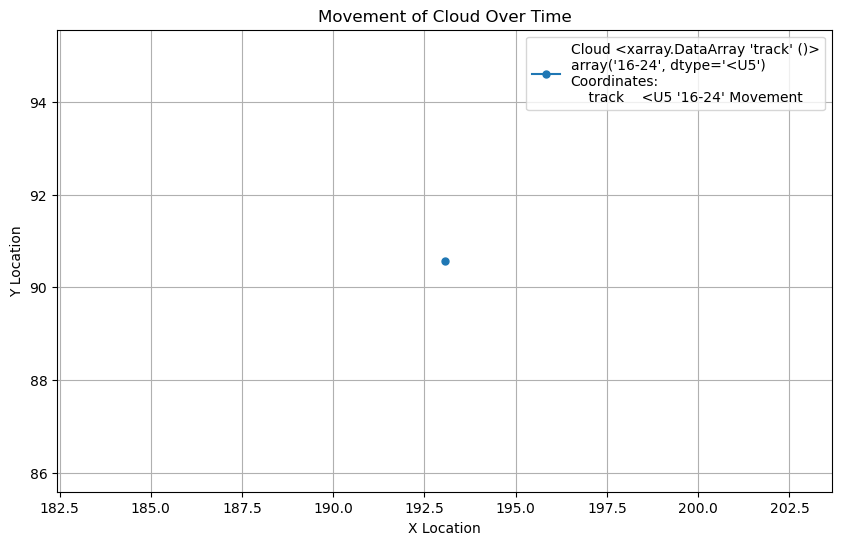

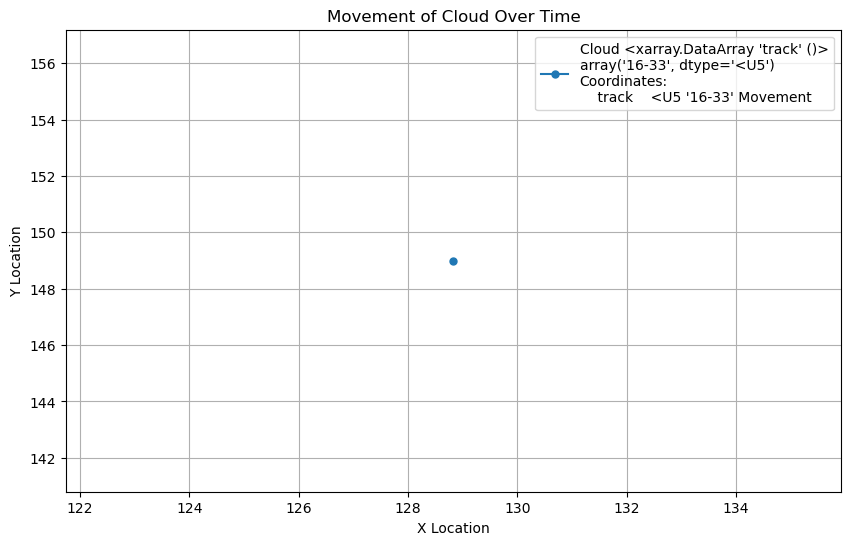

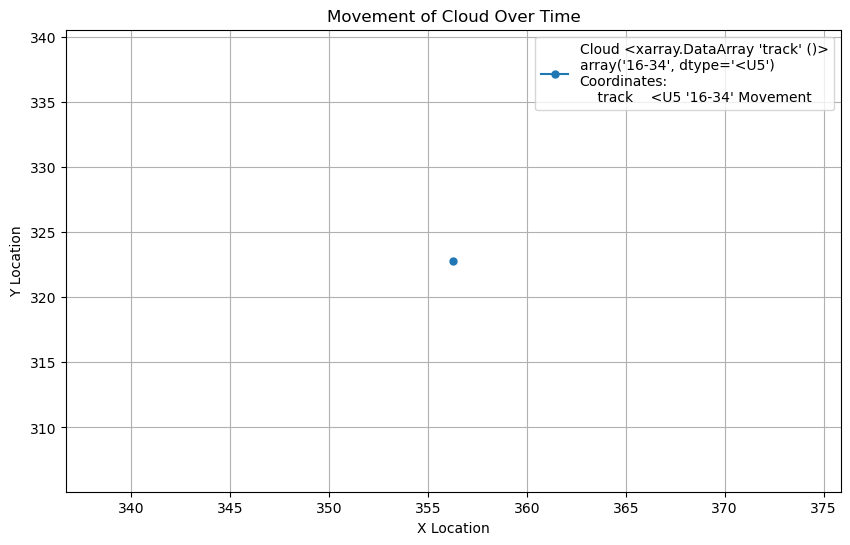

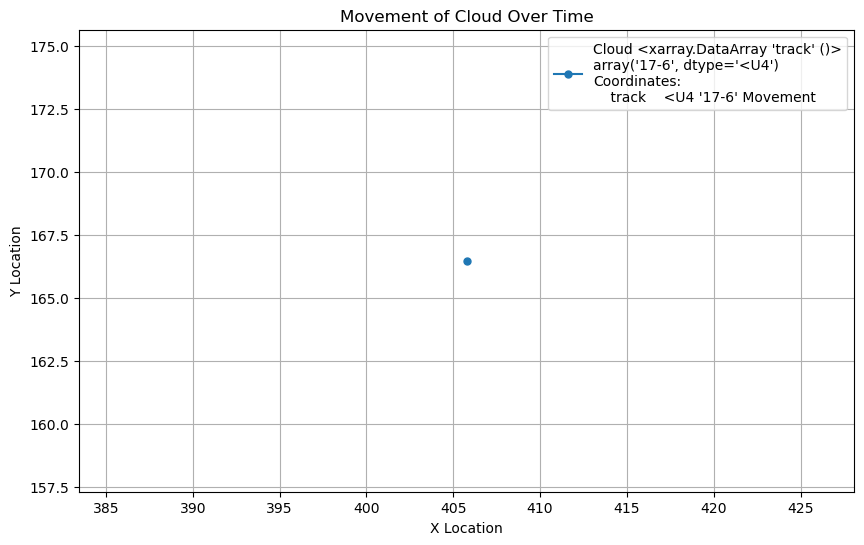

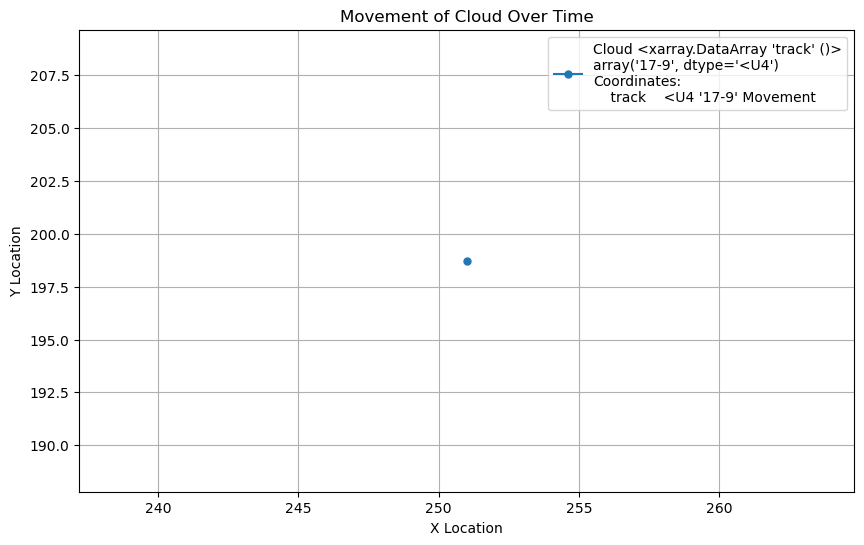

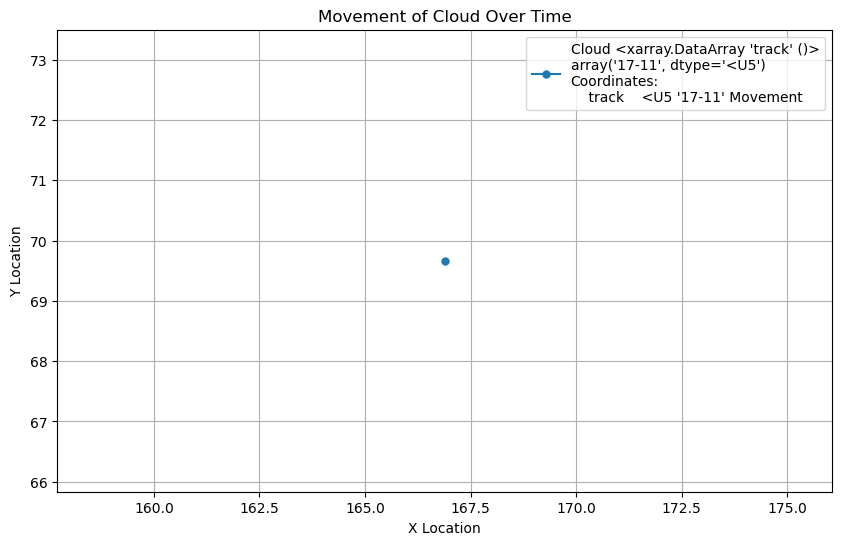

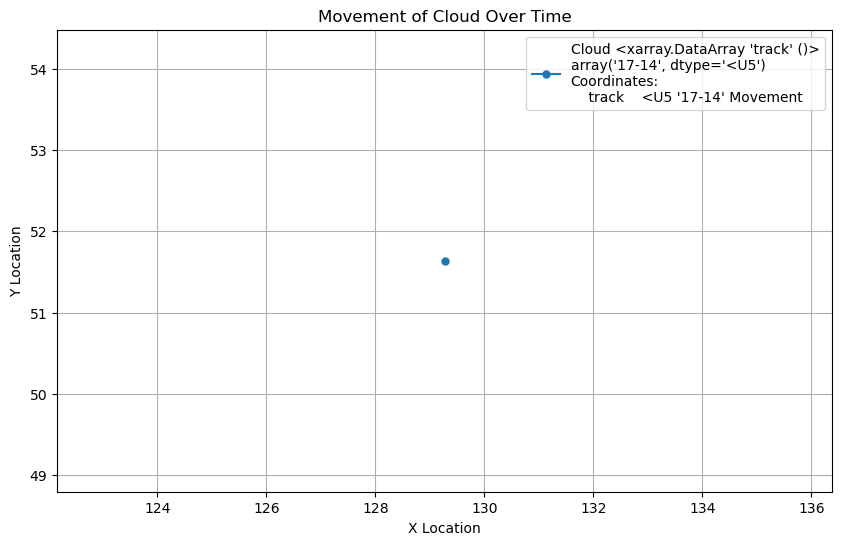

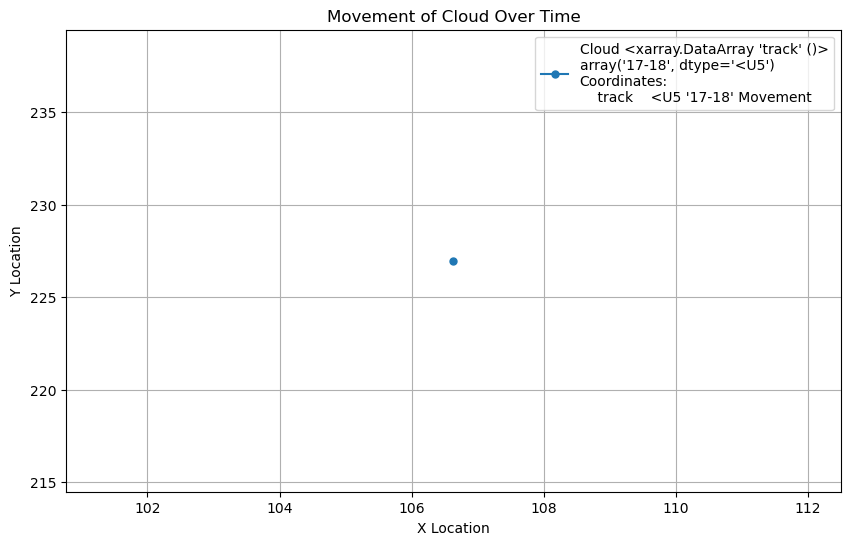

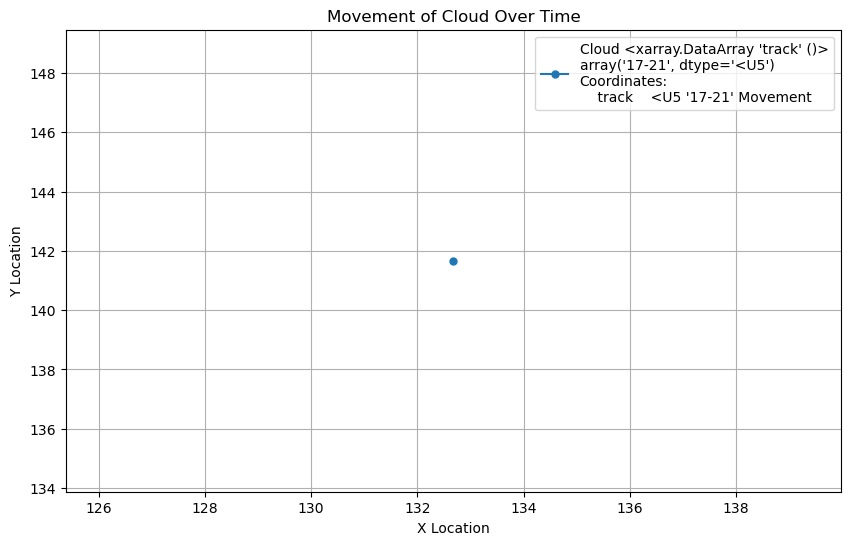

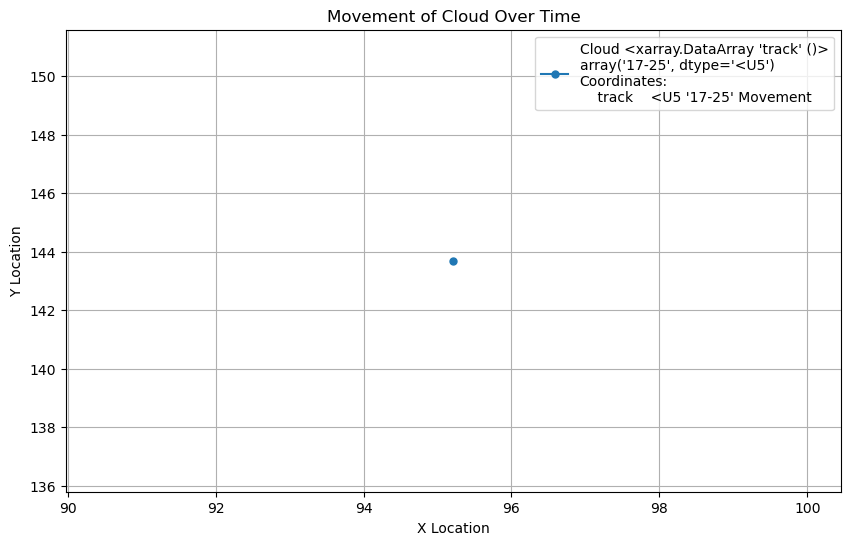

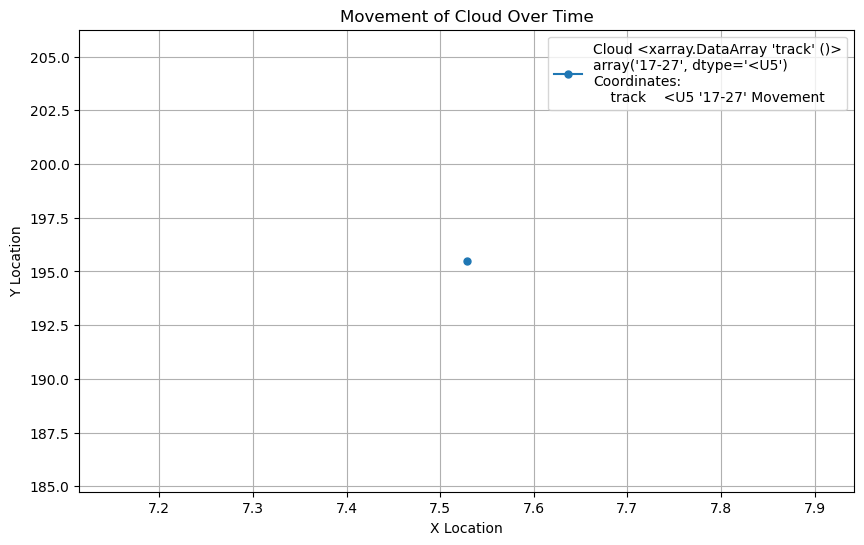

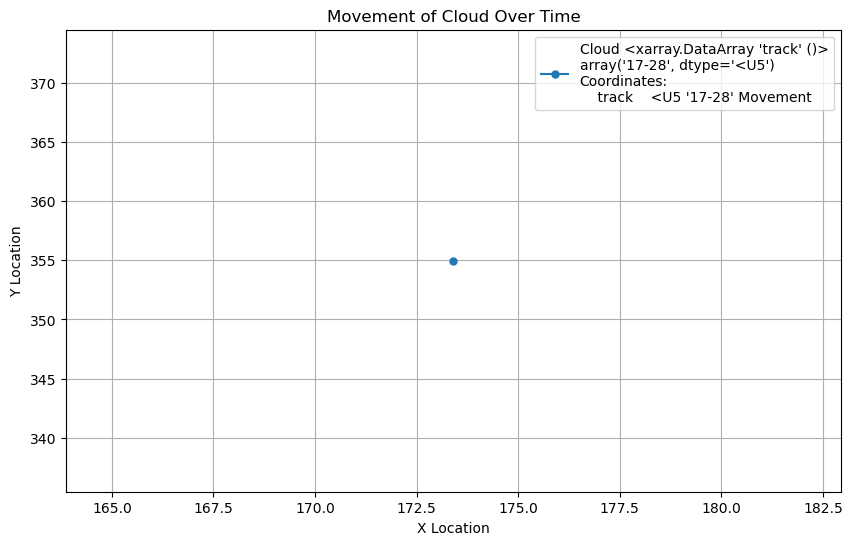

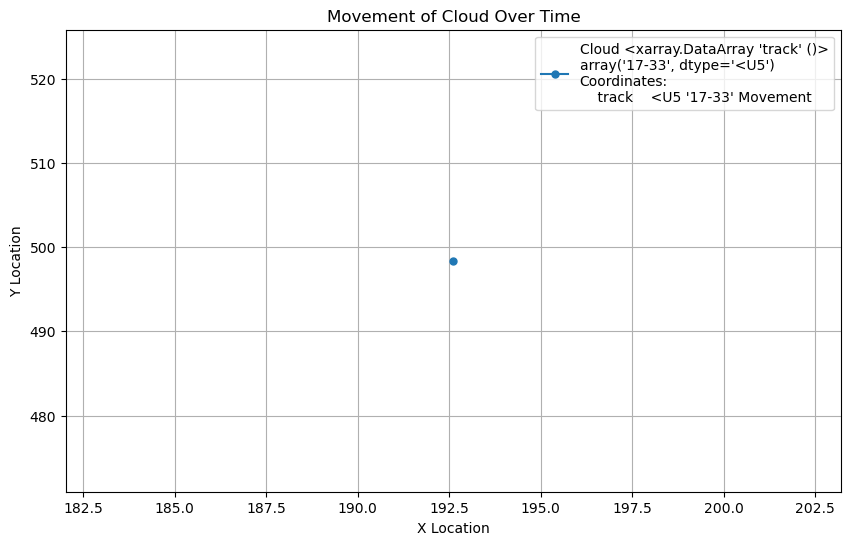

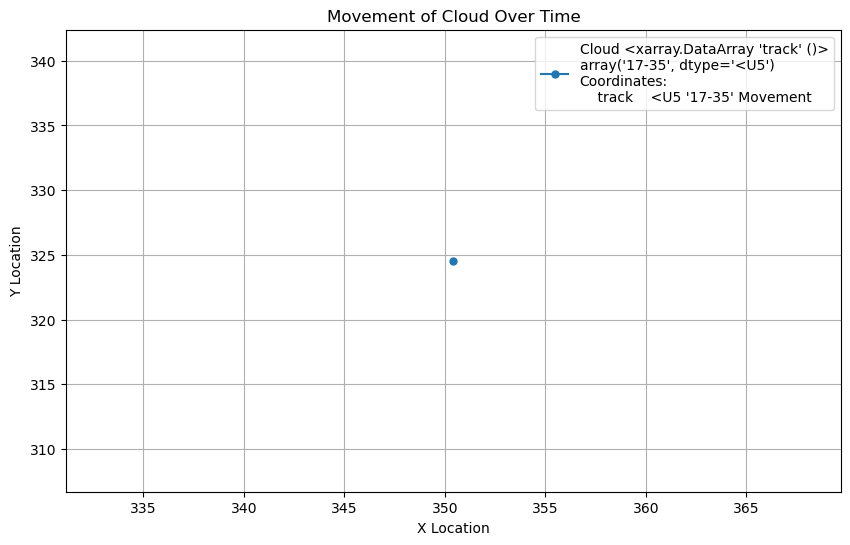

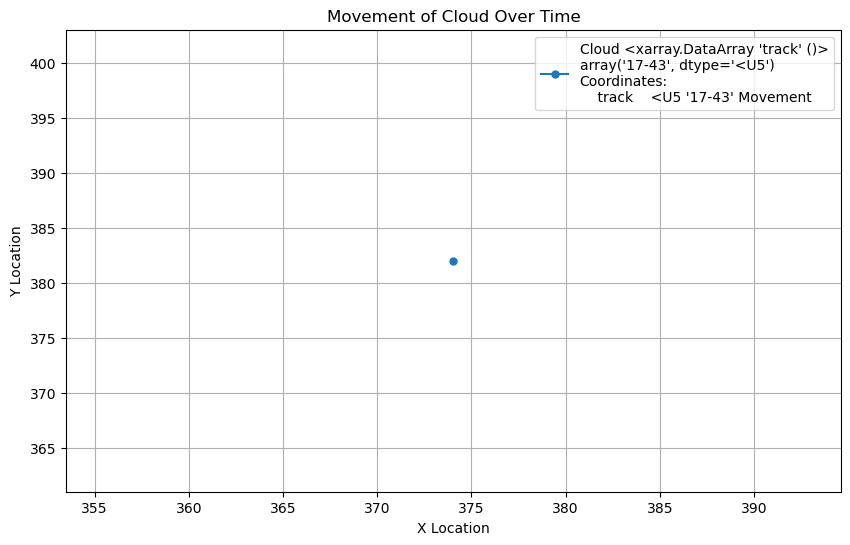

In [4]:
import xarray as xr

ds = xr.open_dataset('../cloud_results.nc')
ids = ds['track']

for i in range (0,len(ids)):
    
    track_id = ids[i]

    # Extract the locations of the cloud across all timesteps
    location_x = ds['location_x'].sel(track=track_id)
    location_y = ds['location_y'].sel(track=track_id)

    # Plotting the cloud's movement
    plt.figure(figsize=(10, 6))
    plt.plot(location_x, location_y, marker='o', linestyle='-', markersize=5, label=f'Cloud {track_id} Movement')
    plt.xlabel('X Location')
    plt.ylabel('Y Location')
    plt.title('Movement of Cloud Over Time')
    plt.legend()
    plt.grid(True)
    plt.show()
